# 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Data Loading and Description

- The dataset consists of the information about Summer Olympic Games. Various variables present in the dataset includes data of atheletes, sports, events, participatin countries etc. 
- The dataset comprises of __31165 observations of 9 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Year          | Olympic Season Year                                       | 
| City          | City where games held                                     |  
| Sport         | Sport category                                            | 
| Discipline    | Name of Sport                                             |   
| Athlete       | Name of Athlete                                           |
| Country       | Athlete's Country                                         |
| Gender        | Sex of Athlete                                            |
| Event         | Name of Event                                             |
| Medal         | Medals                                                    |

In [1]:
import numpy as np                                          # Implemennts milti-dimensional array and matrices
import pandas as pd                                         # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
olympic = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")

In [3]:
olympic.shape

(31165, 9)

In [4]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
olympic.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
profile = pandas_profiling.ProfileReport(olympic)
profile.to_file(outputfile="olympic_data_before_preprocessing.html")

# Pre-Profiling Summary
- Athlete has a high cardinality: 22762 distinct values 
- Country has a high cardinality: 148 distinct values 
- Discipline has a high cardinality: 67 distinct values 
- Event has a high cardinality: 666 distinct values 
- Dataset has 2 duplicate rows 

In [8]:
# Dropping duplicates
olympic.drop_duplicates(inplace=True)

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(olympic)

,Total,Percent
Country,4,0.012836
Medal,0,0.000000
Event,0,0.000000
Gender,0,0.000000
Athlete,0,0.000000
Discipline,0,0.000000
Sport,0,0.000000
City,0,0.000000
Year,0,0.000000


In [10]:
profile = pandas_profiling.ProfileReport(olympic)
profile.to_file(outputfile="olympic_data_after_preprocessing.html")

In [11]:
# Discipline with maximum medals
olympic.groupby(['Discipline'])['Medal'].value_counts().sort_values(ascending=False)

Discipline         Medal 
Athletics          Silver    1224
                   Gold      1215
                   Bronze    1199
Swimming           Gold       901
Rowing             Gold       890
                   Silver     889
                   Bronze     888
Swimming           Silver     876
                   Bronze     851
Artistic G.        Gold       752
                   Silver     688
                   Bronze     663
Fencing            Gold       552
                   Silver     542
                   Bronze     519
Football           Bronze     509
                   Gold       503
                   Silver     485
Hockey             Gold       485
                   Silver     477
                   Bronze     459
Boxing             Bronze     416
Sailing            Gold       412
Shooting           Silver     386
                   Gold       384
                   Bronze     380
Sailing            Silver     372
Basketball         Gold       342
                   Sil

In [12]:
# Event with maximum Medals
olympic.groupby(['Event'])['Medal'].value_counts().sort_values(ascending=False)

Event                       Medal 
Football                    Bronze    509
                            Gold      503
                            Silver    485
Hockey                      Gold      485
                            Silver    477
                            Bronze    459
Team Competition            Gold      403
                            Silver    372
                            Bronze    372
Basketball                  Gold      342
                            Silver    336
                            Bronze    334
Handball                    Silver    329
Water Polo                  Gold      325
Handball                    Bronze    323
                            Gold      321
Water Polo                  Bronze    318
                            Silver    315
Volleyball                  Gold      312
Team                        Gold      312
Volleyball                  Silver    311
                            Bronze    311
Eight With Coxswain (8+)    Gold      306

In [13]:
olympic.groupby(['Year','Sport'])['Medal'].count()

Year  Sport            
1896  Aquatics              11
      Athletics             37
      Cycling               16
      Fencing                8
      Gymnastics            45
      Shooting              15
      Tennis                10
      Weightlifting          6
      Wrestling              3
1900  Aquatics              61
      Archery               18
      Athletics             76
      Basque Pelota          4
      Cricket               24
      Croquet                8
      Cycling                6
      Equestrian             9
      Fencing               21
      Football              35
      Golf                   6
      Gymnastics             3
      Polo                  12
      Rowing                68
      Rugby                 47
      Sailing               26
      Shooting              52
      Tennis                24
      Tug of War            12
1904  Aquatics              43
      Archery               30
                          ... 
2008  Triathlon

# Questions

## 1. How many uniques events do we have thus far, in Summer Olympics?

In [14]:
#How many events do we have thus far, in Olympics
print("There are {} unique sports thus far, in Olympics". format(olympic["Sport"].nunique()))

There are 43 unique sports thus far, in Olympics


## Not all of the above unique sports were part of Summer Olympics starting 1896. 
## 2. Let us find out which year the sport was inducted into Olympics

In [15]:
#Not all of the above sports were part of Olympics starting 1896. 
#Let us find out which year the sport was inducted into Olympics
olympic.groupby("Sport")["Year"].min().sort_values().reset_index()

,Sport,Year
0,Aquatics,1896
1,Tennis,1896
2,Shooting,1896
3,Weightlifting,1896
4,Gymnastics,1896
5,Fencing,1896
6,Cycling,1896
7,Wrestling,1896
8,Athletics,1896
9,Polo,1900


From the above, we see lot of events are present since 1896 but there are sports that are part of Olympics, more recently. Let us use a plot to visualize the early years (1896 to 1950)

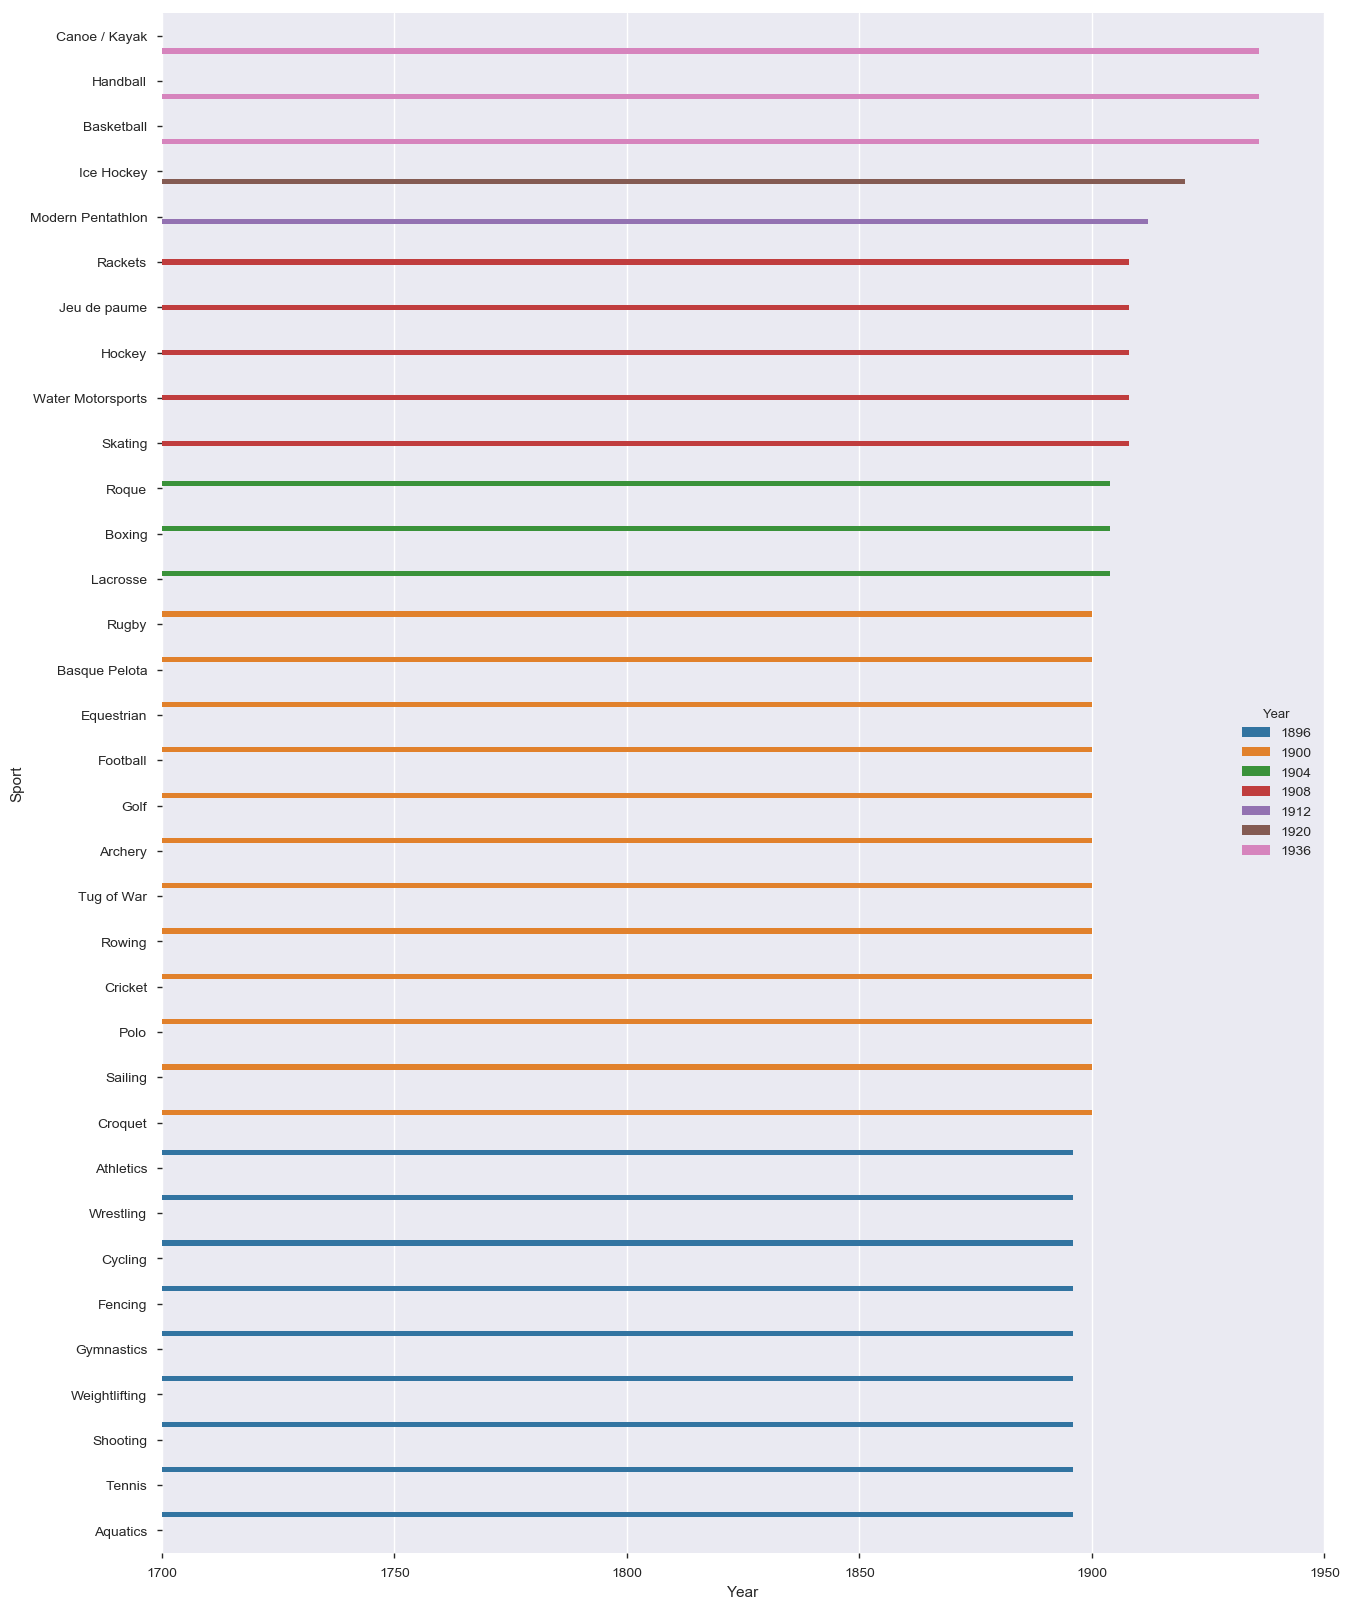

In [16]:
df_sports = olympic[olympic["Year"]<1950].groupby("Sport")["Year"].min().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
plt.xlim(1700,1950)
sns.barplot(x = "Year", y = "Sport", hue="Year", data=df_sports)  
plt.show()

Do not confuse length of bar as length of the sport. The length reflects the year the event was part of Olympics

1. Wrestling, Shoooting, Weighlifting, Gymanstics and few more, seem to be available since the beginning (1896).
2. Basketball, Canoeing, Alpine Skiing, Handball were seen first, around 1936

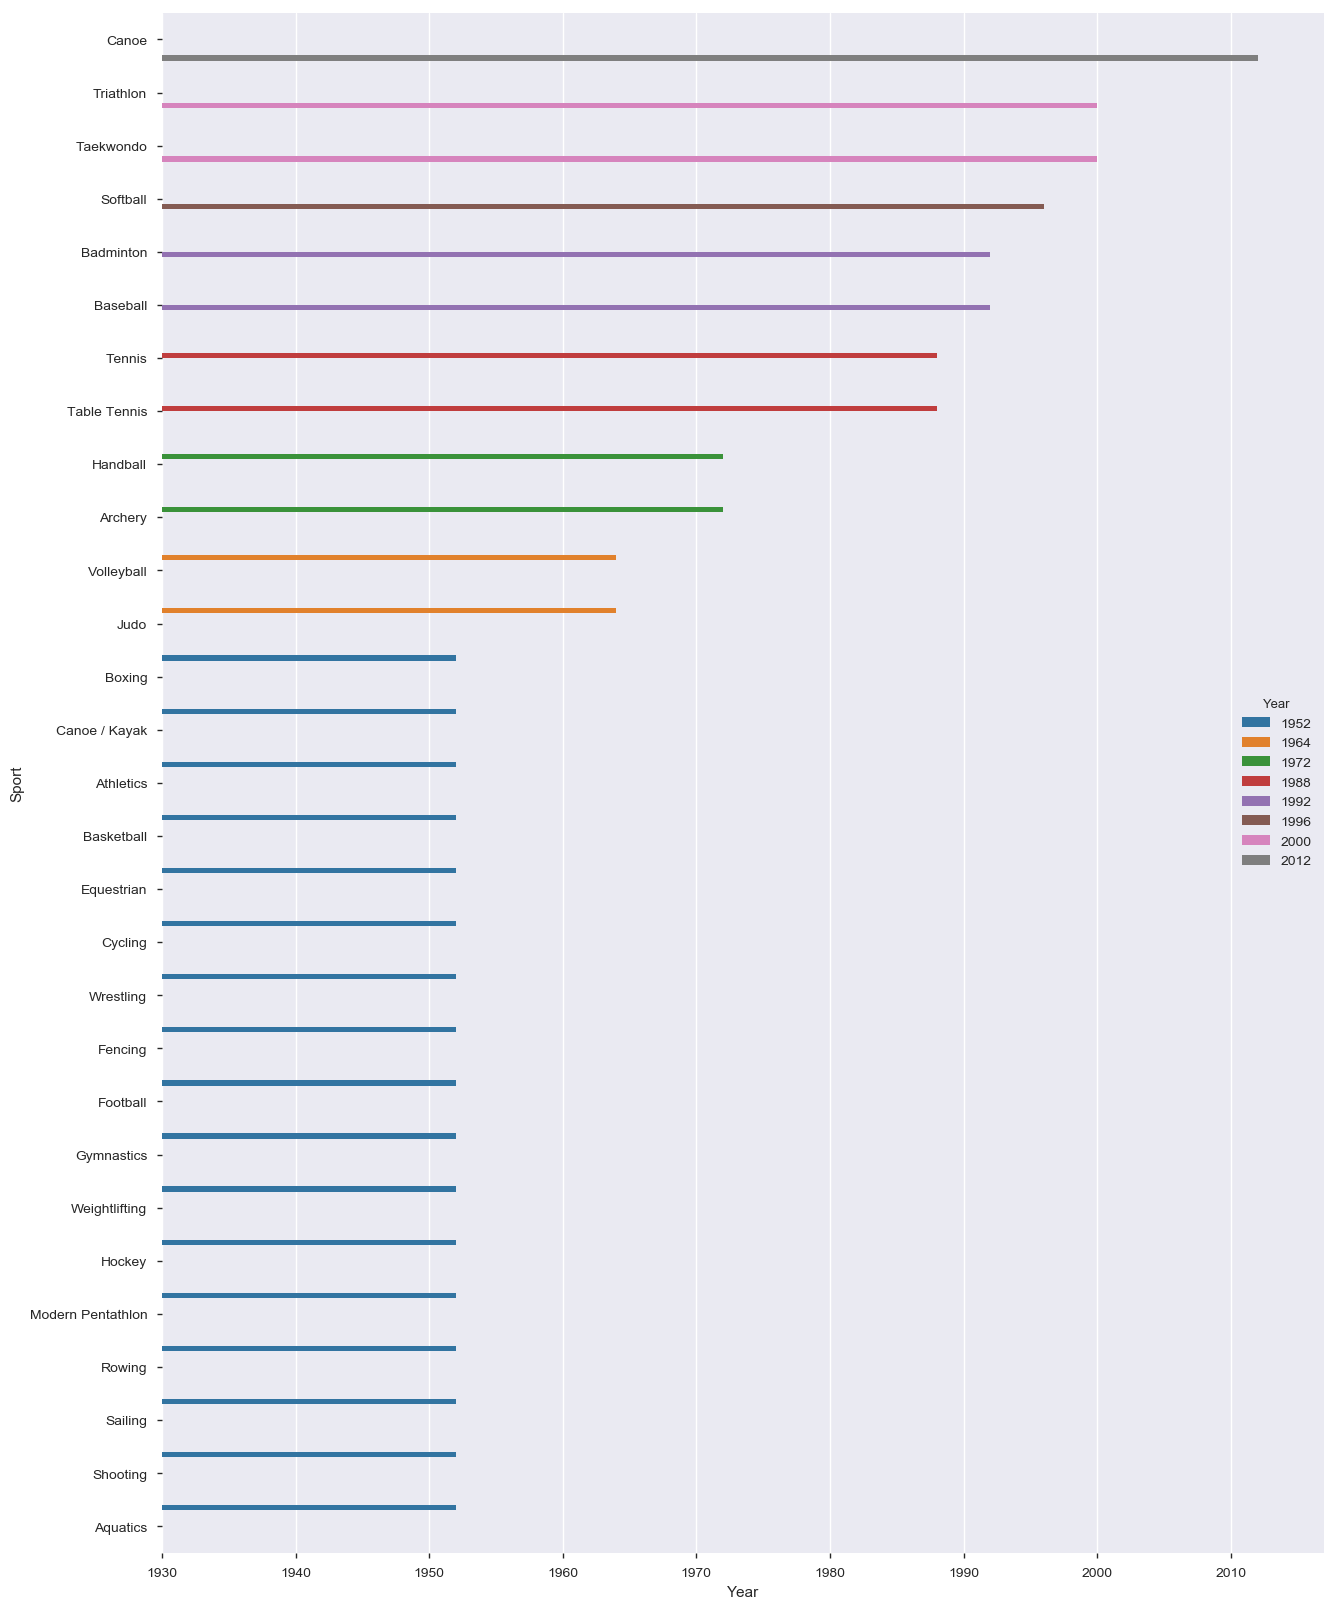

In [17]:
df_sports = olympic[olympic["Year"]>=1950].groupby("Sport")["Year"].min().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
plt.xlim(1930,2017)
sns.barplot(x = "Year", y = "Sport", hue="Year", data=df_sports)
plt.show()

Do not confuse length of bar as length of the sport. The length reflects the year the event was part of Olympics

Canoe were recently included into Olympics (2012)

## 3. What is the number of Sports held per year in Summer Olypics, since 1896?

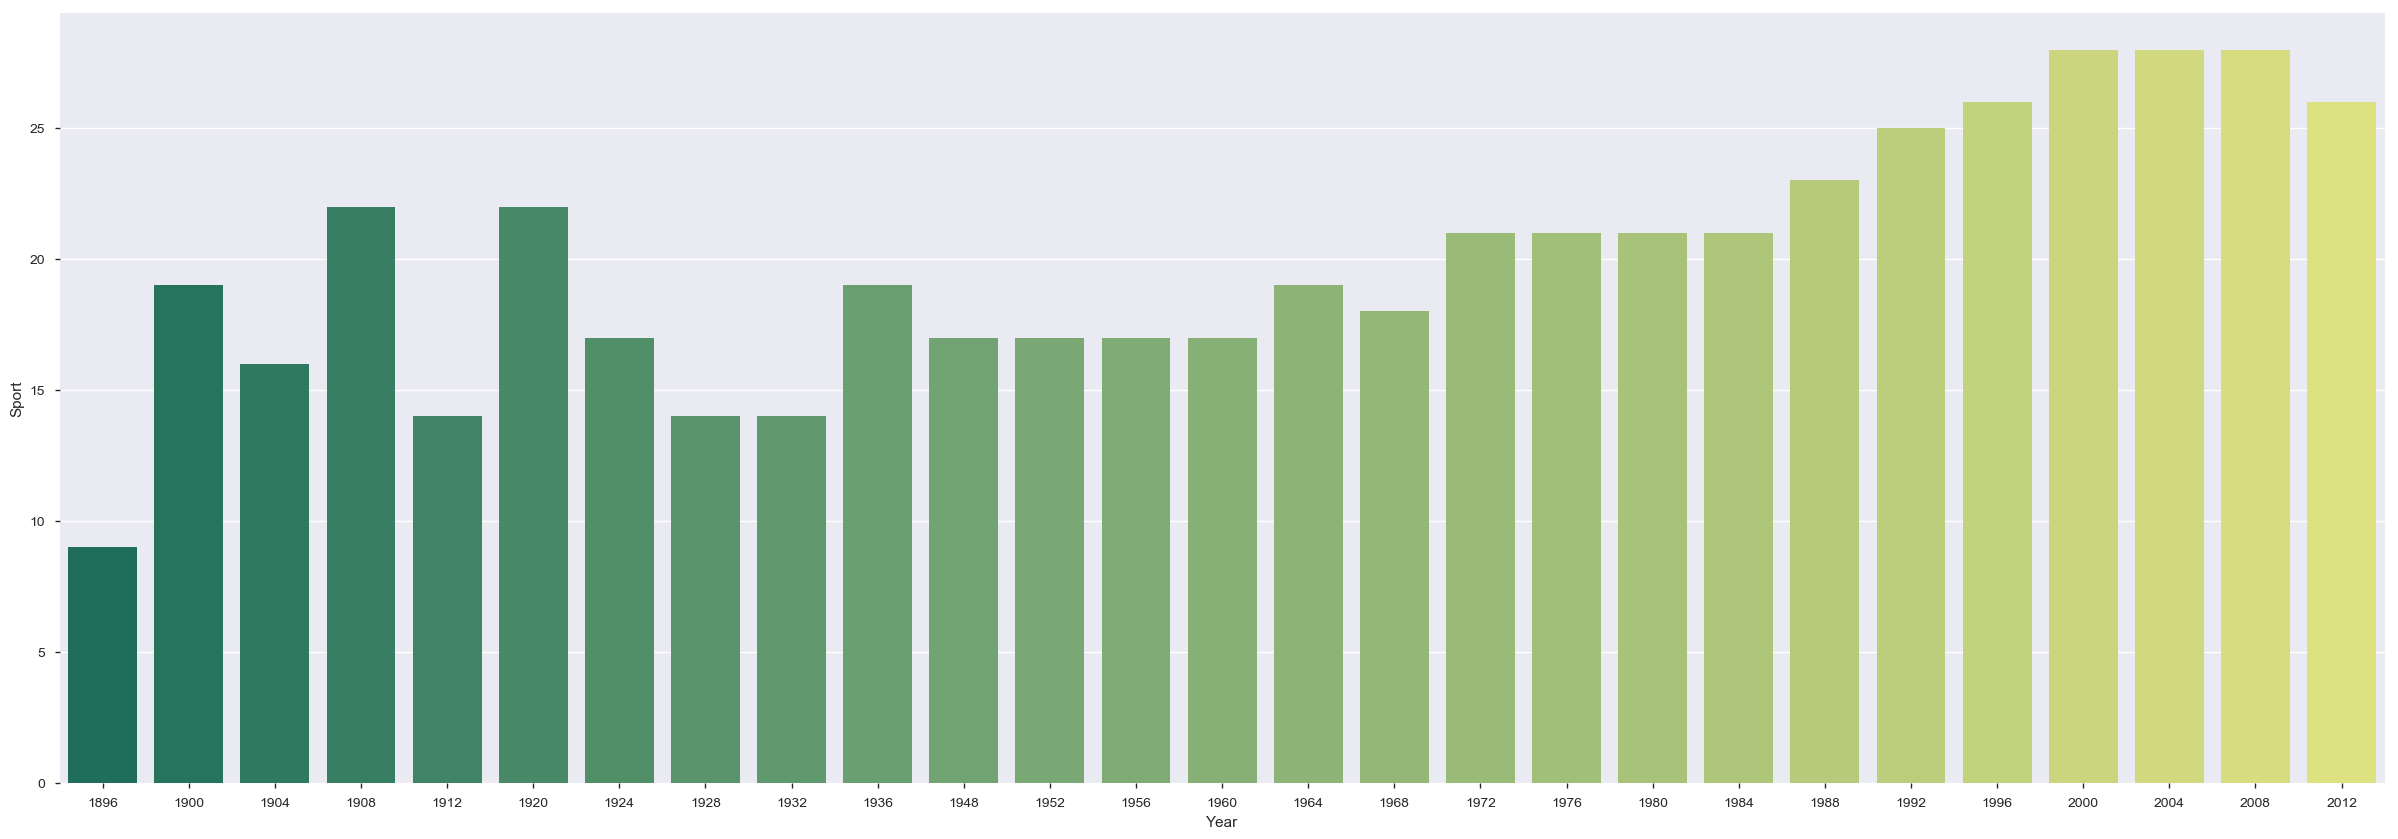

In [18]:
#Let us summarize number of "Sports" held per year, starting 1896
df_sports = olympic.groupby("Year")["Sport"].nunique().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(30,10))
fig.add_subplot(111)
sns.barplot(x = "Year", y = "Sport", data=df_sports, palette="summer", saturation=.65 )

1. 2002, 2004 & 2008 seems to be the year where most Sports events were held
2. 1896 seems to be the year with lowest number of Sports events, this is the year Olympics started.
3. From 1984 we see a raise, and it is almost consistent from 1996.

## 4. How is the gender participation in Summer Olympics, since 1896?

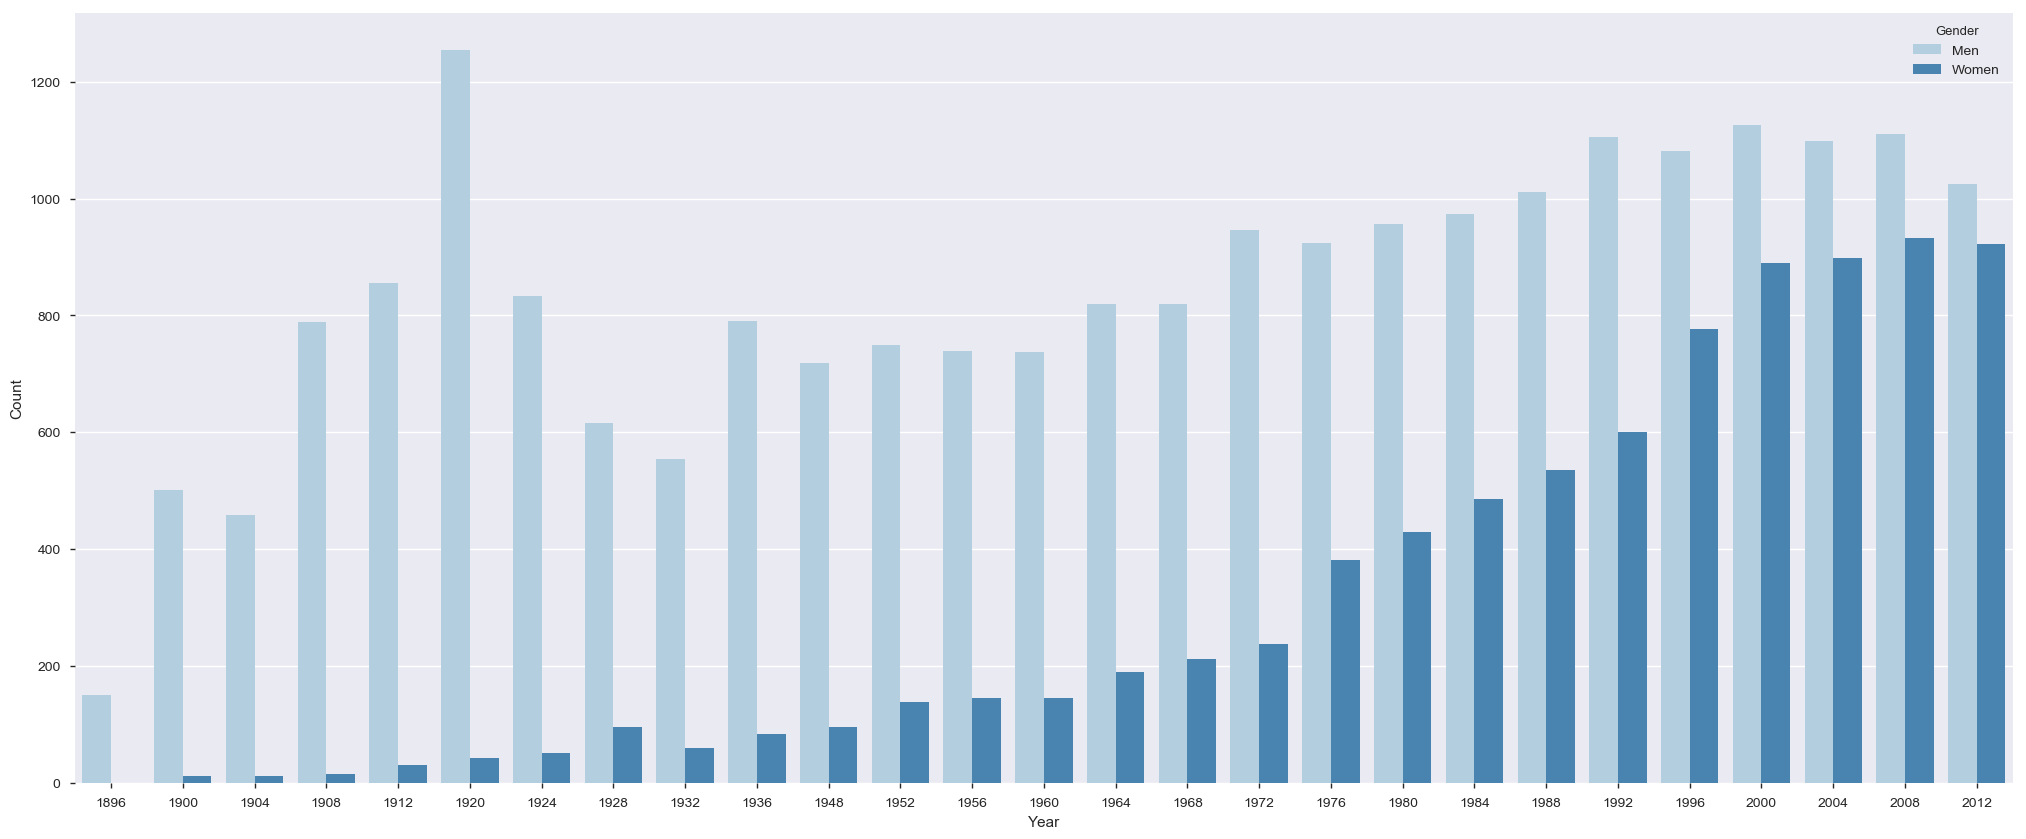

In [19]:
#Now that we have looked the events across the years, let us look at the gender participation in these events
df_sports = olympic.groupby(["Year","Gender"])["Sport"].count().reset_index().rename(columns={"Sport":"Count"})
plt.figure(figsize=(25,10))
sns.barplot(x="Year", y = "Count", hue = "Gender", data = df_sports, palette = "Blues" )

1. In 1986 Olympics, participants were all Men.
2. Women participation seems less and has slightly improved, post 1972.
3. Post 1972, we see Women participation grow but they still are lesser than the count of Men who participate in these games.
4. Olympics continues to be male dominated though trends show this is likely to change in near future.

In [21]:
#Adding id to the dataset, for analysis 
olympic['id'] = range(0, len(olympic))
olympic.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,id
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,2
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,3
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,4


## 5. Overall Gender Distribution for Summer Olympics

Text(0.5, 1.0, 'SUMMER OLYMPICS')

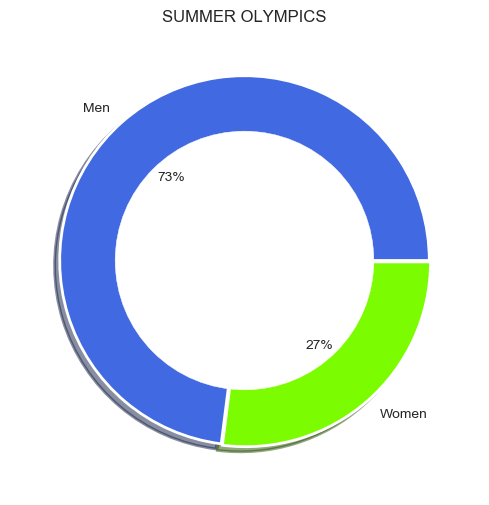

In [22]:
plt.figure(figsize=(13,6))
olympic.groupby("Gender")["id"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["royalblue","lawngreen"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

## 6. How many cities hosted the Summer Olympics games, since 1896?
### 6.1 How many cities in which Olympics was conducted more than once?

In [23]:
#How many Cities are there since 1896?
print("There are {} cities in whicn Olympics was conducted since 1896".format (olympic["City"].value_counts().nunique()))

#How many cities in which Olympics was conducted more than once?
olympic.groupby(["City"])["Year"].nunique().sort_values(ascending=False)


There are 21 cities in whicn Olympics was conducted since 1896


City
London                   3
Los Angeles              2
Athens                   2
Paris                    2
Tokyo                    1
Antwerp                  1
Atlanta                  1
Barcelona                1
Beijing                  1
Berlin                   1
Helsinki                 1
Melbourne / Stockholm    1
Sydney                   1
Mexico                   1
Montreal                 1
Moscow                   1
Munich                   1
Rome                     1
Seoul                    1
St Louis                 1
Stockholm                1
Amsterdam                1
Name: Year, dtype: int64

There are __21 cities__ in which Summer Olympics was conducted since 1896

1. __London__ have been the most preferred place for Olympic (3 times).
2. Los Angeles, Athens and Paris have facilitated Olympics twice.
3. Other cities have 1 each.

## 7. Which country won the most Gold medals, in each of the Olympics?

In [24]:
#Which country won the most Gold medals, in each of the Olympics?
df_sports  = olympic[olympic["Medal"]=="Gold"].groupby(["Year","Country"], as_index=False)["id"].count().rename(columns={"id":"Total"})
df_sports.iloc[df_sports.groupby(["Year"])["Total"].idxmax()]

,Year,Country,Total
5,1896,GER,26
18,1900,GBR,48
32,1904,USA,146
39,1908,GBR,144
61,1912,SWE,86
77,1920,USA,110
95,1924,USA,110
123,1928,USA,43
143,1932,USA,78
152,1936,GER,88


Overall, with repect to __Gold medals__,

1. __United States__ seems to top the list, with more than twice the medal haul of the second place holder __USR(Soviet)__.
2. __Germanay__ and __Great Britain__ comes third
3. __Sweden__ and __EUN__ has the least.

## 8. How many medals were won by women in Summer Olympics?

In [25]:
womenInOlympics = olympic[(olympic['Gender'] == 'Women')&(olympic['Medal'] == 'Gold')]
womenInOlympics.groupby(['Year'])['Medal'].value_counts().sort_values(ascending=False)

Year  Medal
2008  Gold     307
2012  Gold     302
2004  Gold     298
2000  Gold     293
1996  Gold     259
1992  Gold     200
1988  Gold     172
1984  Gold     163
1980  Gold     143
1976  Gold     127
1972  Gold      80
1968  Gold      71
1964  Gold      63
1960  Gold      49
1956  Gold      46
1952  Gold      46
1948  Gold      32
1928  Gold      32
1936  Gold      28
1932  Gold      20
1924  Gold      17
1920  Gold      15
1912  Gold      10
1904  Gold       6
1908  Gold       5
1900  Gold       3
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Women medals per edition of the Games')

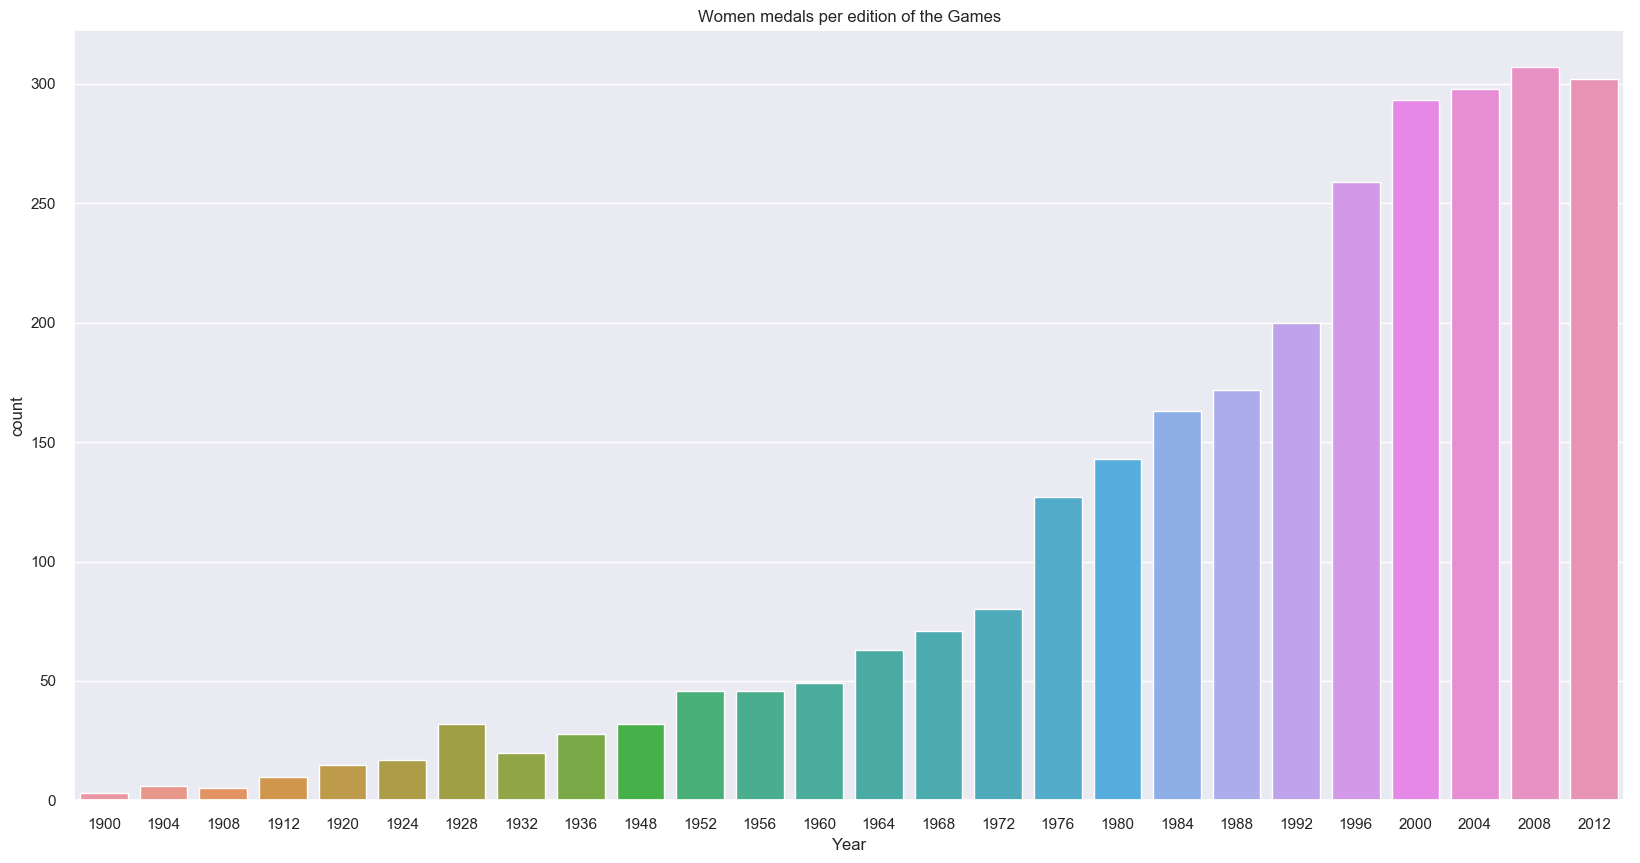

In [26]:
#Women - medals per edition of the Games
#womenInOlympics = olympic[(olympic['Gender'] == 'Women')&(olympic['Medal'] == 'Gold')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

# 9. Top 10 Women Athletes - Gold Medals

In [27]:
womenInOlympics.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete               Medal
LATYNINA, Larisa      Gold     9
THOMPSON, Jenny       Gold     8
FISCHER, Birgit       Gold     8
CASLAVSKA, Vera       Gold     7
VAN DYKEN, Amy        Gold     6
OTTO, Kristin         Gold     6
VEZZALI, Valentina    Gold     6
WERTH, Isabell        Gold     5
ANDRUNACHE, Georgeta  Gold     5
LIPA, Elisabeta       Gold     5
Name: Medal, dtype: int64

## 9.1 Top 10 Women Athletes - Total Medals 

In [28]:
womenInOlympicsTotalMedal = olympic[(olympic['Gender'] == 'Women')]
womenInOlympicsTotalMedal.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete                    Medal 
LATYNINA, Larisa           Gold      9
FISCHER, Birgit            Gold      8
THOMPSON, Jenny            Gold      8
CASLAVSKA, Vera            Gold      7
VAN DYKEN, Amy             Gold      6
BABASHOFF, Shirley Farber  Silver    6
VEZZALI, Valentina         Gold      6
OTTEY-PAGE, Merlene        Bronze    6
OTTO, Kristin              Gold      6
VAN ALMSICK, Franziska     Bronze    6
Name: Medal, dtype: int64

# 10. Top 10 Men Athletes - Gold Medals

In [29]:
menInOlympics = olympic[(olympic['Gender'] == 'Men')&(olympic['Medal'] == 'Gold')]
menInOlympics.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete                     Medal
PHELPS, Michael             Gold     18
SPITZ, Mark                 Gold      9
NURMI, Paavo                Gold      9
LEWIS, Carl                 Gold      9
BIONDI, Matthew             Gold      8
KATO, Sawao                 Gold      8
EWRY, Ray                   Gold      8
SHAKHLIN, Boris             Gold      7
CHUKARIN, Viktor Ivanovich  Gold      7
GEREVICH, Aladar            Gold      7
Name: Medal, dtype: int64

## 10.1 Top 10 Men Athletes - Total Medals

In [30]:
menInOlympicsTotalMedal = olympic[(olympic['Gender'] == 'Men')]
menInOlympicsTotalMedal.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete                     Medal
PHELPS, Michael             Gold     18
SPITZ, Mark                 Gold      9
NURMI, Paavo                Gold      9
LEWIS, Carl                 Gold      9
BIONDI, Matthew             Gold      8
EWRY, Ray                   Gold      8
KATO, Sawao                 Gold      8
CHUKARIN, Viktor Ivanovich  Gold      7
ANDRIANOV, Nikolay          Gold      7
GEREVICH, Aladar            Gold      7
Name: Medal, dtype: int64

## 11. Top 5 countries to win most Gold medals across all seasons collectively

In [31]:
olympic[(olympic['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2235
1,URS,838
2,GBR,546
3,ITA,476
4,GER,452


Text(0.5, 1.0, 'Medals per Country')

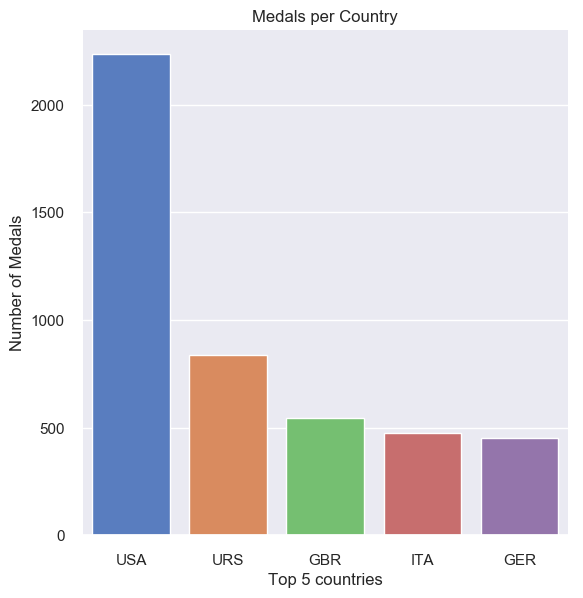

In [32]:
totalGoldMedals = olympic[(olympic['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

The __USA__ seems to win most Gold medals

## 12. Disciplines with the greatest number of Gold Medals

In [33]:
# create a dataframe to filter the gold medals only for the USA.
goldMedalsUSA = olympic[(olympic['Medal']=='Gold')].loc[olympic[(olympic['Medal']=='Gold')]['Country'] == 'USA']

In [34]:
# Now, we can count the medals per discipline:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball,258
1,Eight With Coxswain (8+),126
2,4X100M Medley Relay,111
3,4X100M Relay,107
4,4X100M Freestyle Relay,103
5,4X400M Relay,101
6,Football,91
7,4X200M Freestyle Relay,88
8,Rugby,46
9,Team,46


__Basketball__ is the leading discipline!

We are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of counting the medals per team.

Let's slice the dataframe using only the data of male athletes to better review it:

In [35]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Gender'] == 'Men')].sort_values(['Year'])

In [36]:
basketballGoldUSA.head(15)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,id
6548,1936,Berlin,Basketball,Basketball,"BALTER, Samuel J. Jr.",USA,Men,Basketball,Gold,6548
6561,1936,Berlin,Basketball,Basketball,"WHEATLEY, William John",USA,Men,Basketball,Gold,6561
6560,1936,Berlin,Basketball,Basketball,"SWANSON, Duane Alexander",USA,Men,Basketball,Gold,6560
6559,1936,Berlin,Basketball,Basketball,"SHY, Carl L.",USA,Men,Basketball,Gold,6559
6557,1936,Berlin,Basketball,Basketball,"RAGLAND, Jack Williamson",USA,Men,Basketball,Gold,6557
6556,1936,Berlin,Basketball,Basketball,"PIPER, Donald Arthur",USA,Men,Basketball,Gold,6556
6555,1936,Berlin,Basketball,Basketball,"MOLLNER, Arthur Owen",USA,Men,Basketball,Gold,6555
6558,1936,Berlin,Basketball,Basketball,"SCHMIDT, Willard Theodore",USA,Men,Basketball,Gold,6558
6553,1936,Berlin,Basketball,Basketball,"KNOWLES, Carl Stanley",USA,Men,Basketball,Gold,6553
6552,1936,Berlin,Basketball,Basketball,"JOHNSON, Francis Lee",USA,Men,Basketball,Gold,6552


What we supposed is true: the medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!


Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [37]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,id
Year,,,,,,,,,
1936,Berlin,Basketball,Basketball,"BALTER, Samuel J. Jr.",USA,Men,Basketball,Gold,6548
1948,London,Basketball,Basketball,"KURLAND, Robert Albert",USA,Men,Basketball,Gold,7441
1952,Helsinki,Basketball,Basketball,"KURLAND, Robert Albert",USA,Men,Basketball,Gold,8260
1956,Melbourne / Stockholm,Basketball,Basketball,"WALSH, James Patrick",USA,Men,Basketball,Gold,9155
1960,Rome,Basketball,Basketball,"WEST, Jeremy Alan",USA,Men,Basketball,Gold,10072
1964,Tokyo,Basketball,Basketball,"WILSON, George",USA,Men,Basketball,Gold,10977
1968,Mexico,Basketball,Basketball,"SAULTERS, Glynn",USA,Men,Basketball,Gold,12015
1976,Montreal,Basketball,Basketball,"SHEPPARD, Steven",USA,Men,Basketball,Gold,14235
1984,Los Angeles,Basketball,Basketball,"WOOD, Leonard III",USA,Men,Basketball,Gold,16973


In [38]:
# counting the records obtained
groupedBasketUSA['id'].count()

14

## 13. Evolution of the Olympics over time

Now lets try to answer the following questions:

1. How the number of athletes/countries varied along time ?
2. How the proportion of Men/Women varied with time ?

In [39]:
# Variation of male/female athletes over time
MenOverTime = olympic[(olympic.Gender == 'Men')]
WomenOverTime = olympic[(olympic.Gender == 'Women')]

### 13.1 How is the variation of Male Athletes over time?

Text(0.5, 1.0, 'Variation of Male Athletes over time')

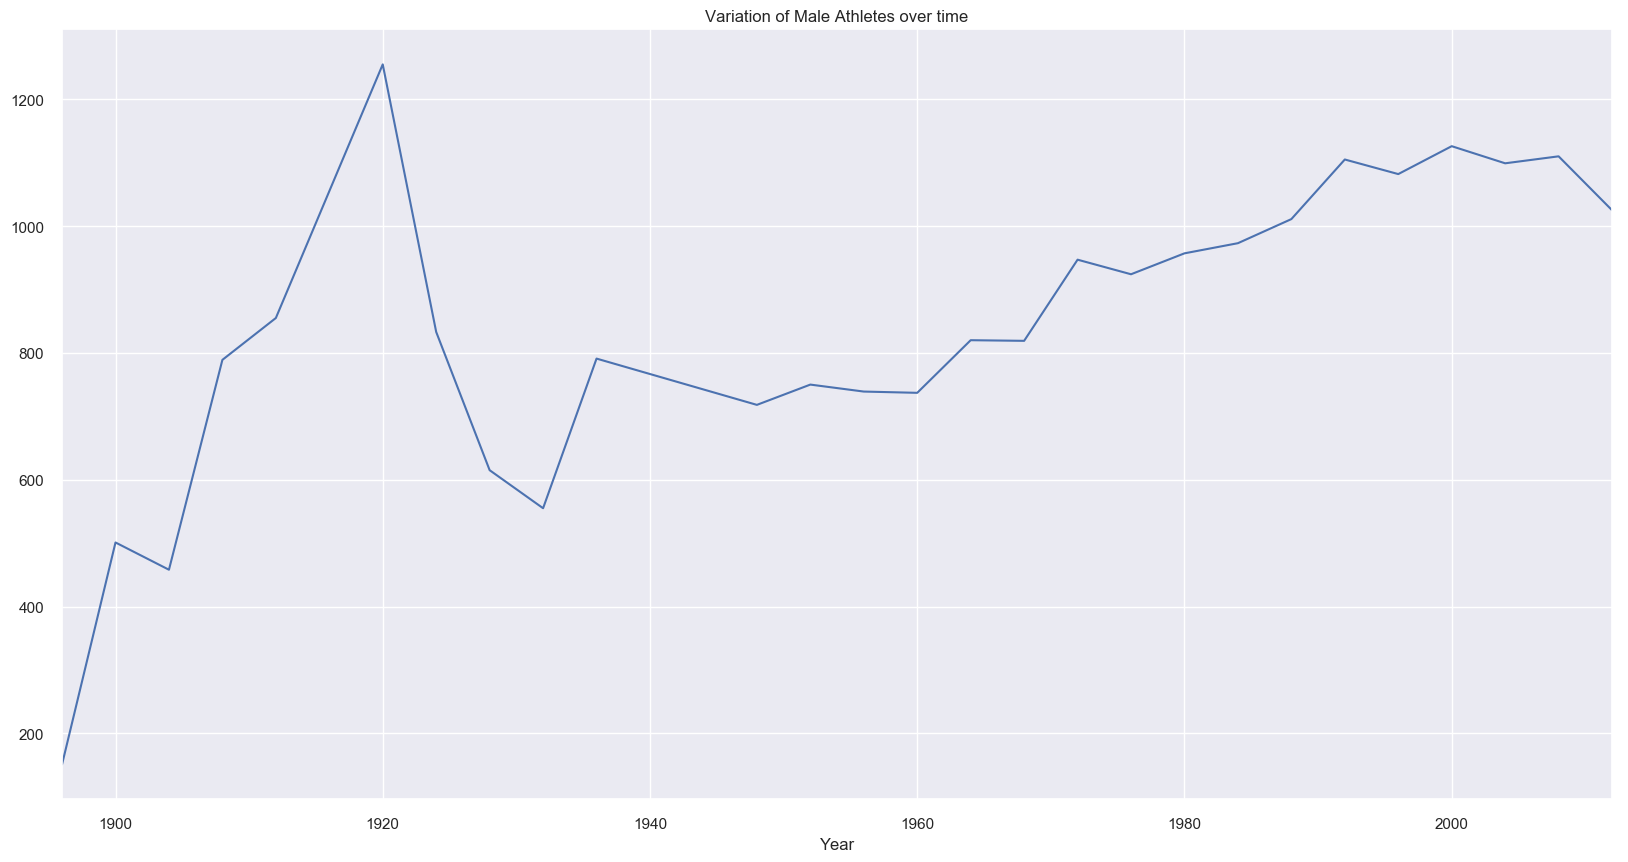

In [40]:
# Variation of Male Athletes over time
part = MenOverTime.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'Men'].plot()
plt.title('Variation of Male Athletes over time')

### 13.2 How is the variation of Female Athletes over time?

Text(0.5, 1.0, 'Variation of Female Athletes over time')

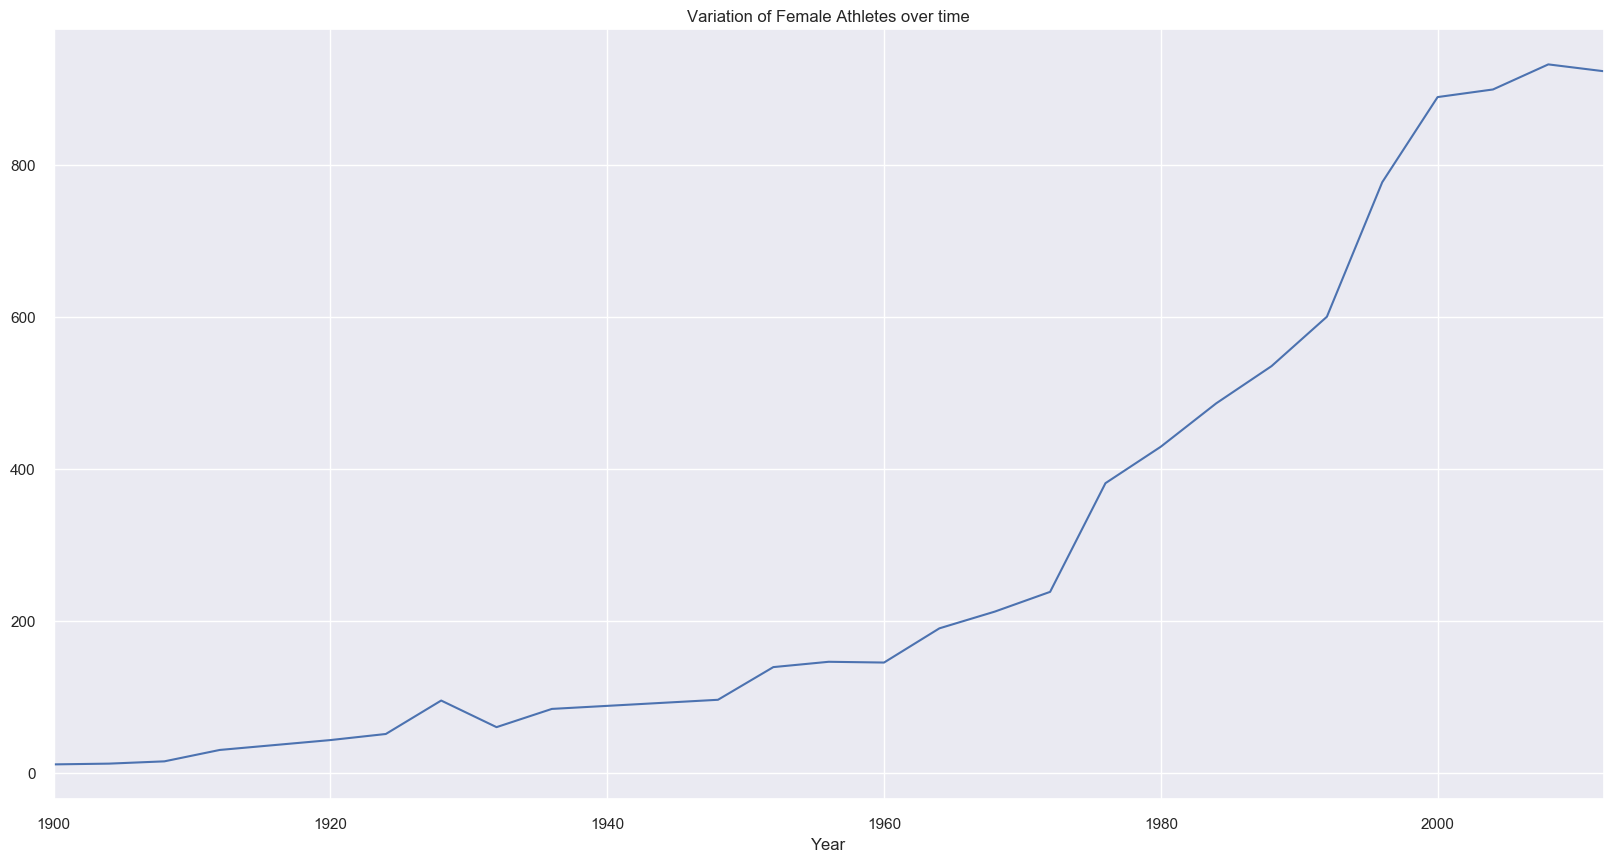

In [41]:
# Variation of Female Athletes over time
part = WomenOverTime.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'Women'].plot()
plt.title('Variation of Female Athletes over time')

### Immediate Observations

#### for women:

1. We have a steep increase in the population;
2. Rapid growth post 1970.
3. For now, the growth is more or less constant.

#### for men:
1. The growth for men seems less strong:
2. After the 2000 we can see a relevant decrease in the number of male athletes at the summer games;
3. The growth has decreased recently.

## 13.3 How the number of athletes participation varied along time ?

Text(0, 0.5, 'Count')

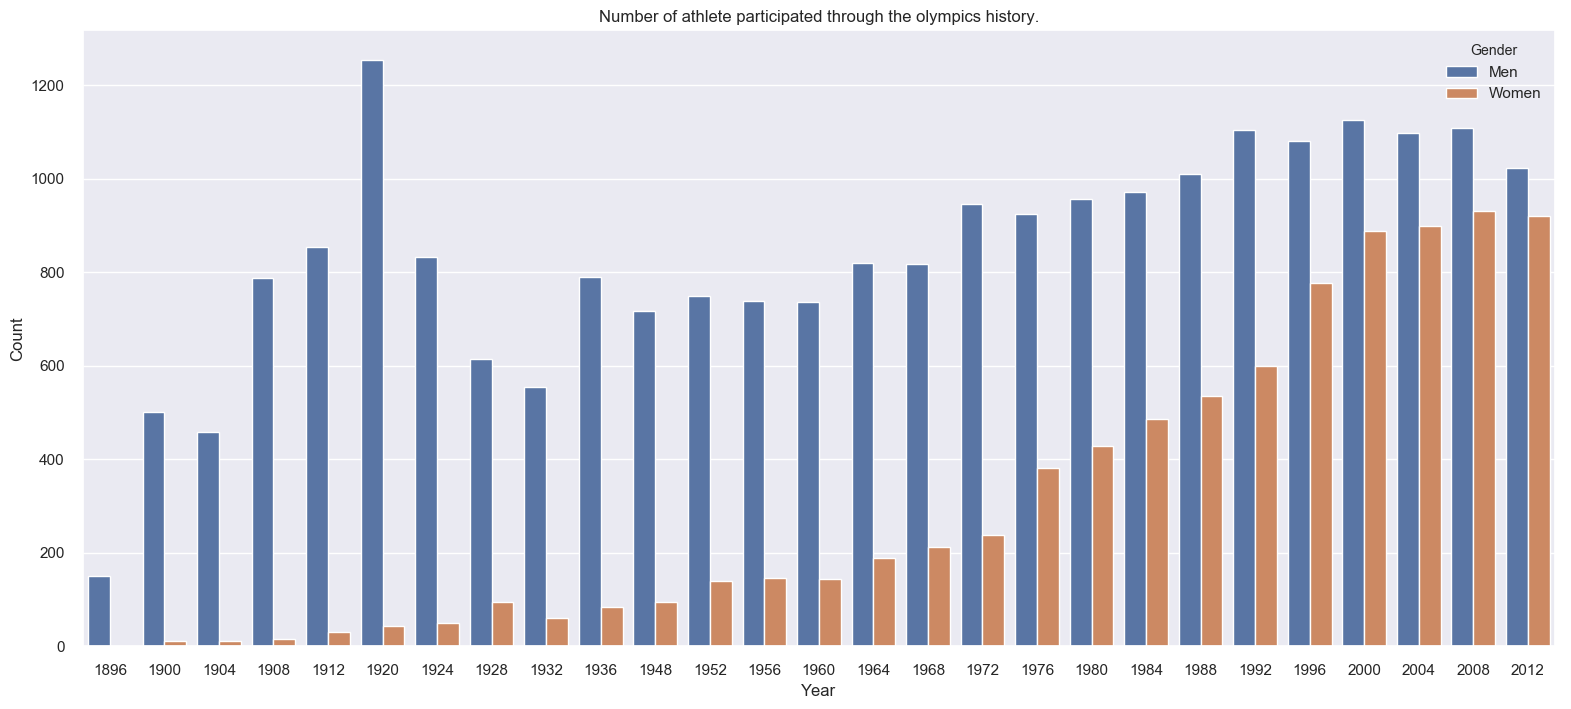

In [42]:
plt.figure(figsize=(19,8))
ax = sns.barplot(x='Year', y='Country', hue='Gender', data=olympic.groupby(['Year', 'Gender'], as_index=False).count())
ax.set_title('Number of athlete participated through the olympics history.')
ax.set_ylabel('Count')

## 14. How many athlete participated in each sport in Summer Olympics?

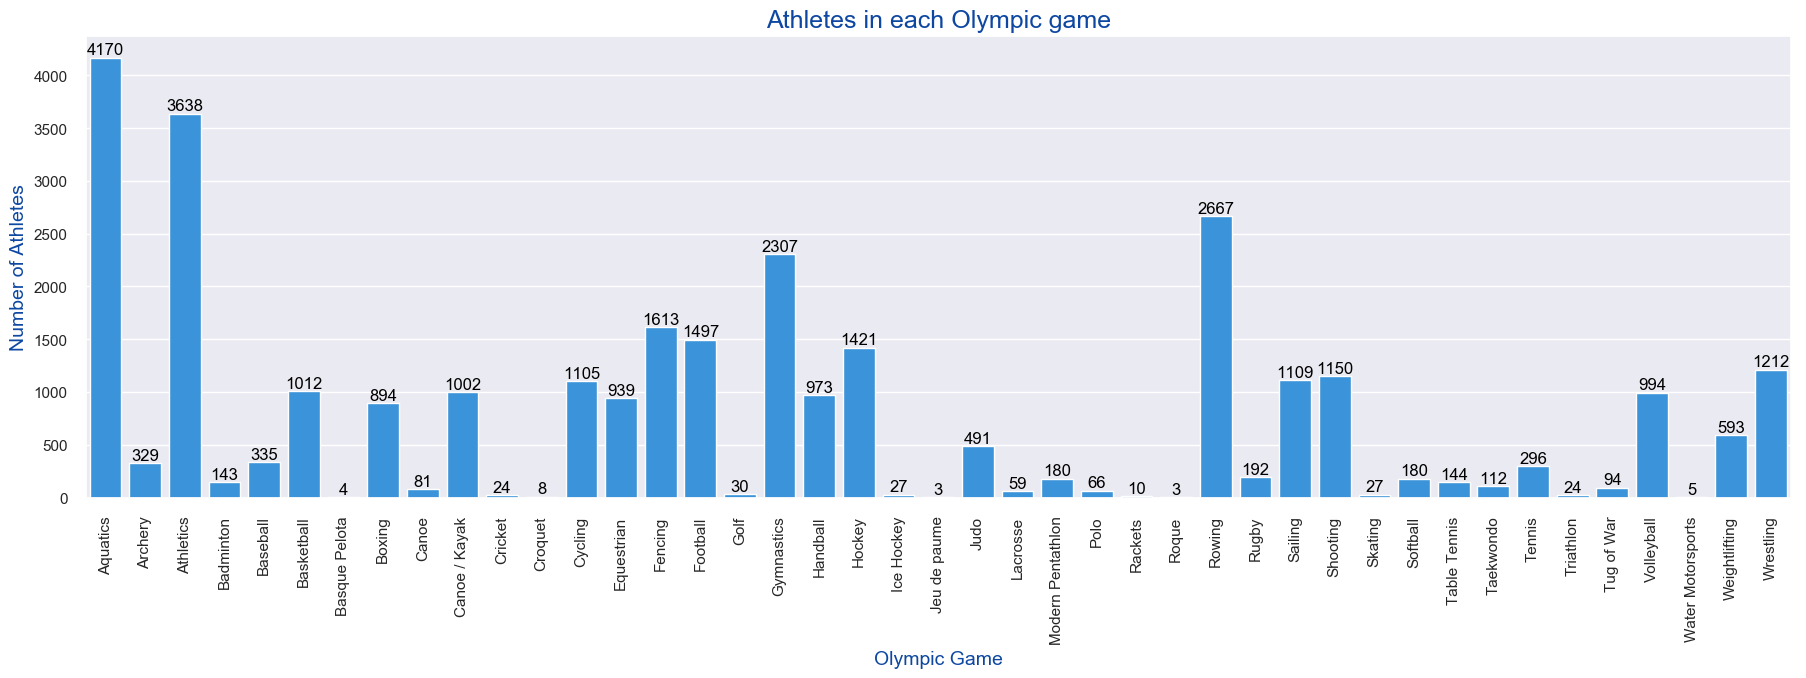

In [43]:
# Athletes in each olympic games
games_athletes = olympic.pivot_table(olympic, index=['Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Sport','id']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Sport', y='id', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Sport'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

## 15. How many athlete participate in each Summer Olympic?

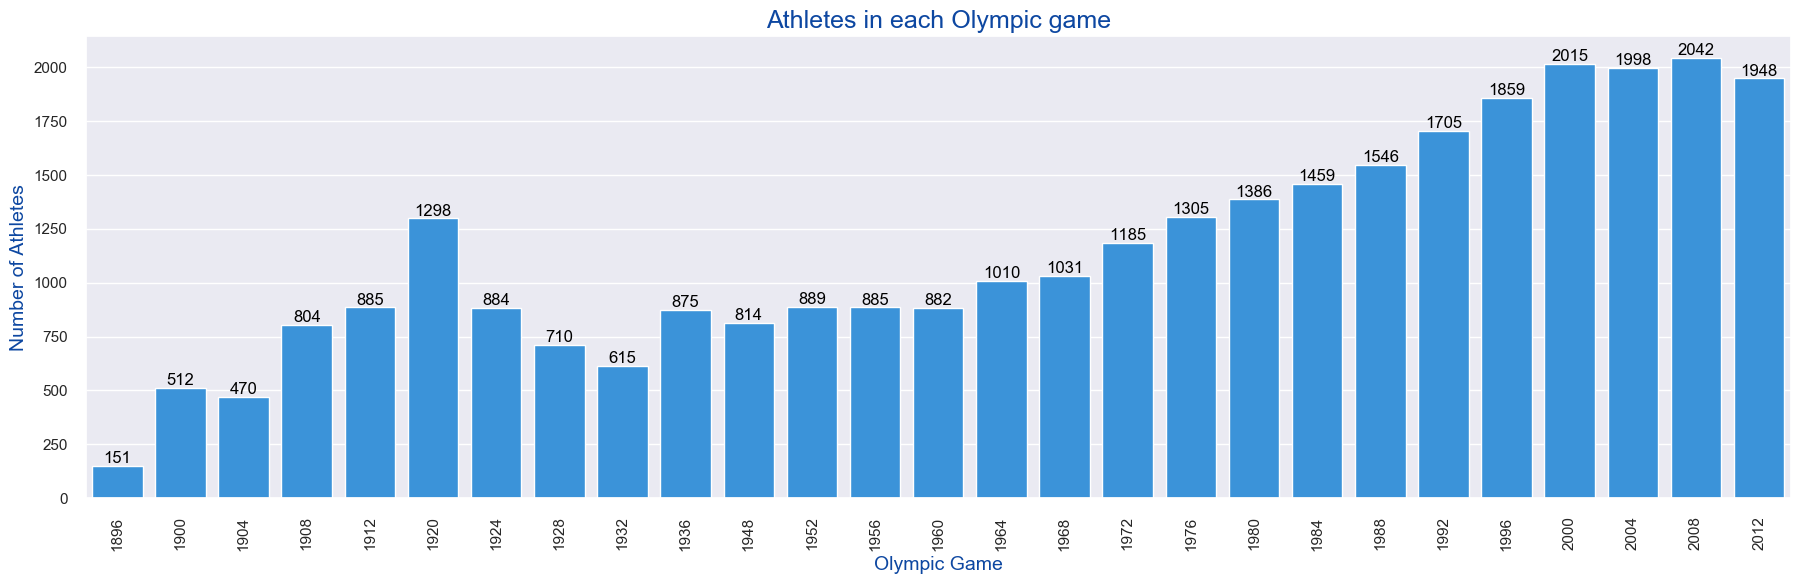

In [44]:
# Total Athletes in each olympic games
games_athletes = olympic.pivot_table(olympic, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Year', y='id', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Year'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

## 16. How is the distribution of athlete, sport and events across each Summer Olympic?

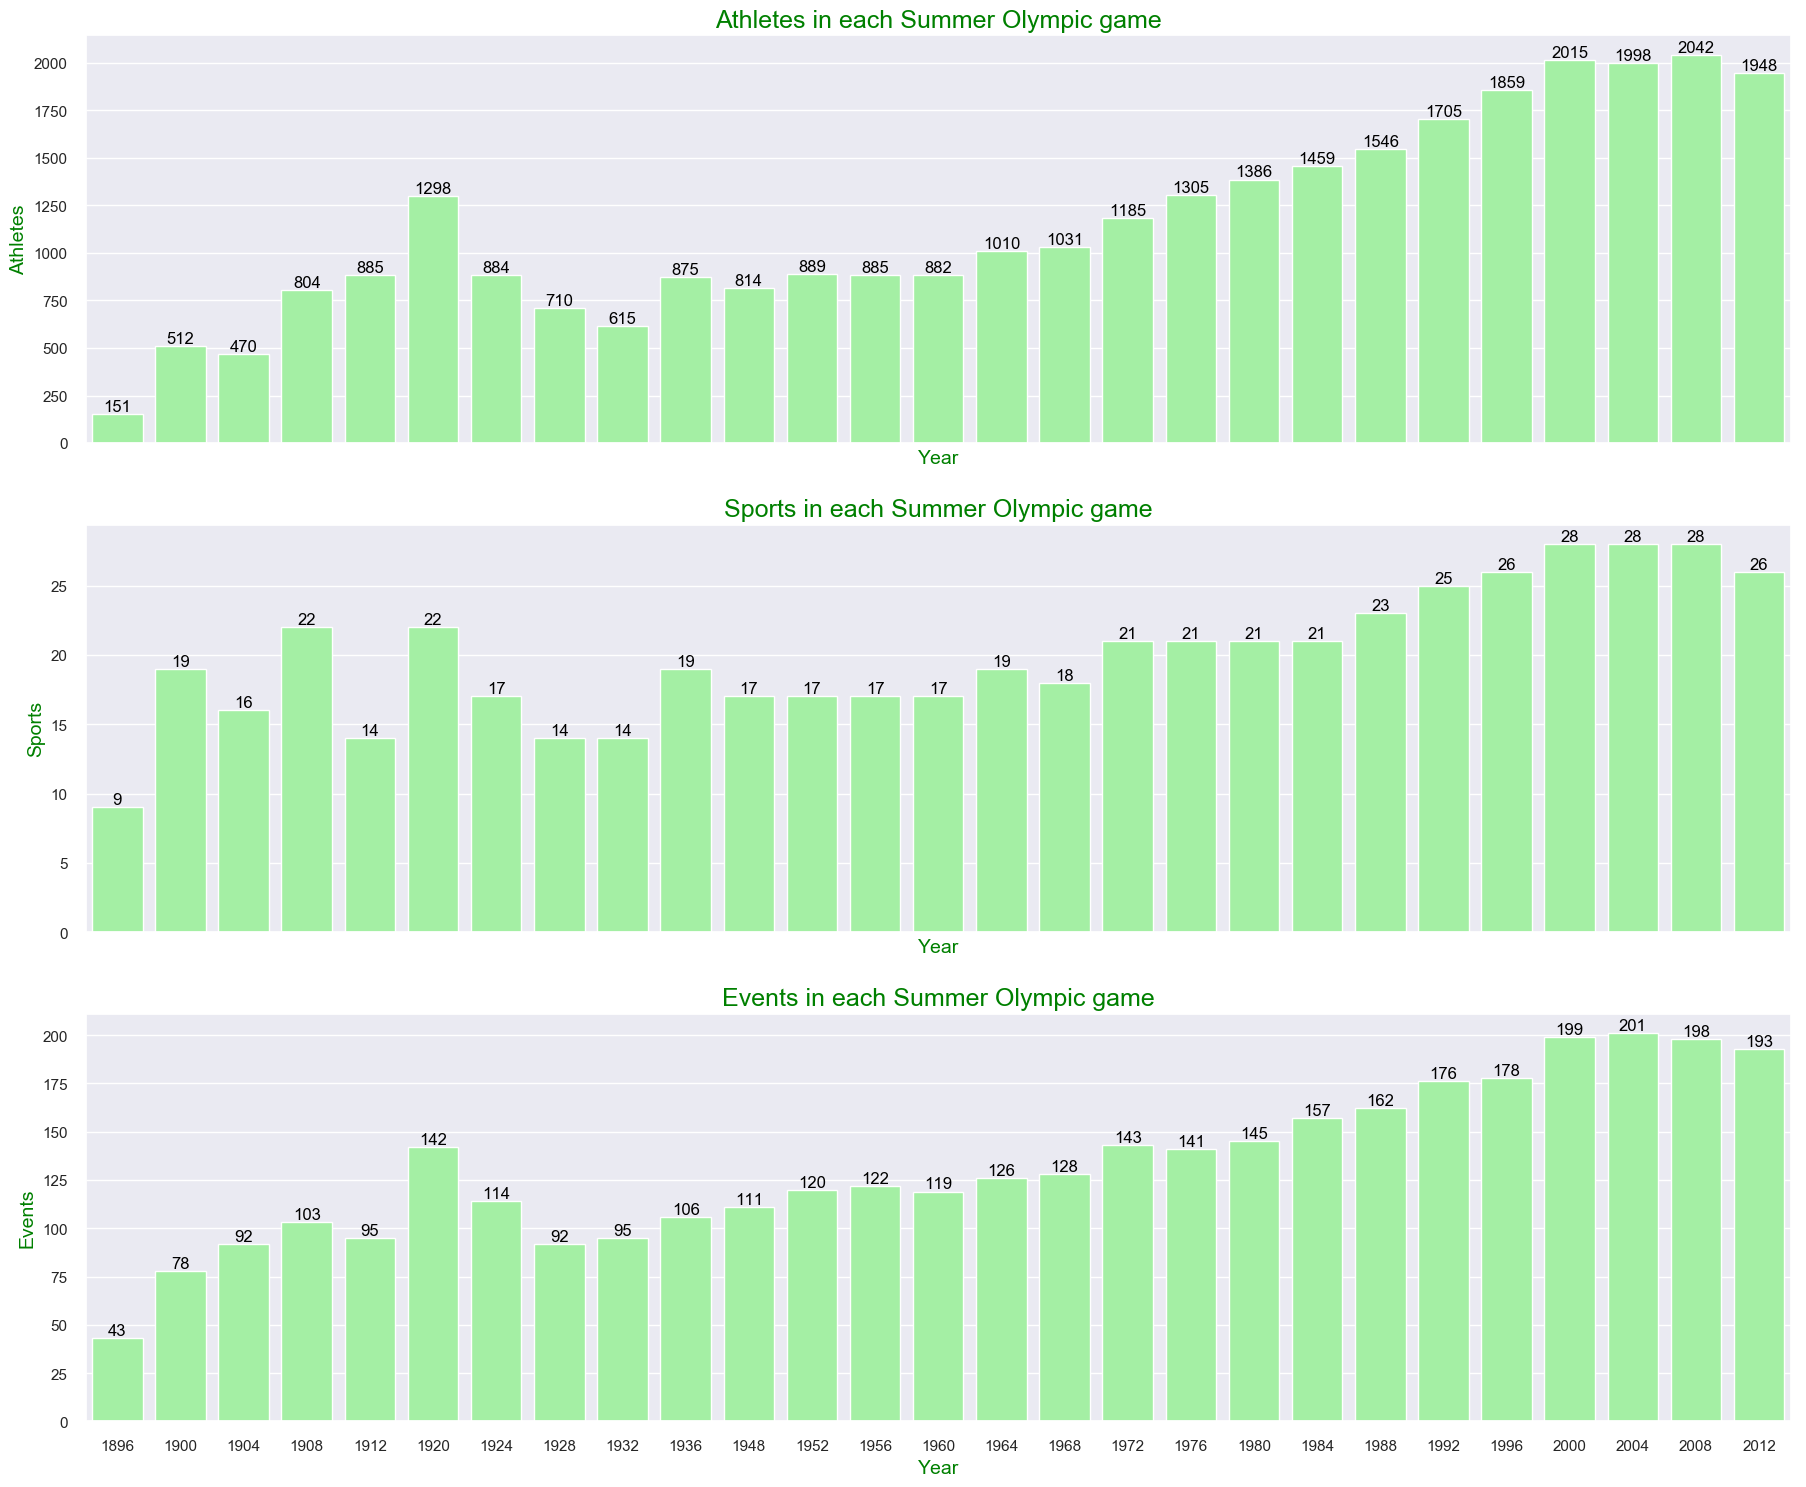

In [45]:
#summer = olympic[olympic['Season']=='Summer']

summer_athletes = olympic.pivot_table(olympic, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
summer_sports = olympic.groupby('Year')['Sport'].nunique().reset_index()
summer_events = olympic.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='id', data=summer_athletes, ax=ax[0], color="palegreen")
sns.barplot(x='Year', y='Sport', data=summer_sports, ax=ax[1], color="palegreen")
sns.barplot(x='Year', y='Event', data=summer_events, ax=ax[2], color="palegreen")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('Year', size=14, color="green")
    ax[j].set_ylabel(i, size=14, color="green")
    ax[j].set_title(i + ' in each Summer Olympic game', size=18, color="green")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()


1. Growth is __saturated__ and started moving in __negative direction__ in number of __athletes__
2. __28 sports__ competitions is the maximum in a summer olympic game.
3. __Events__ have come to a __saturation point__ in the last 4 summer games.

## 17. What is the YoY growth of Athlete participation in each Summer Olympic game?

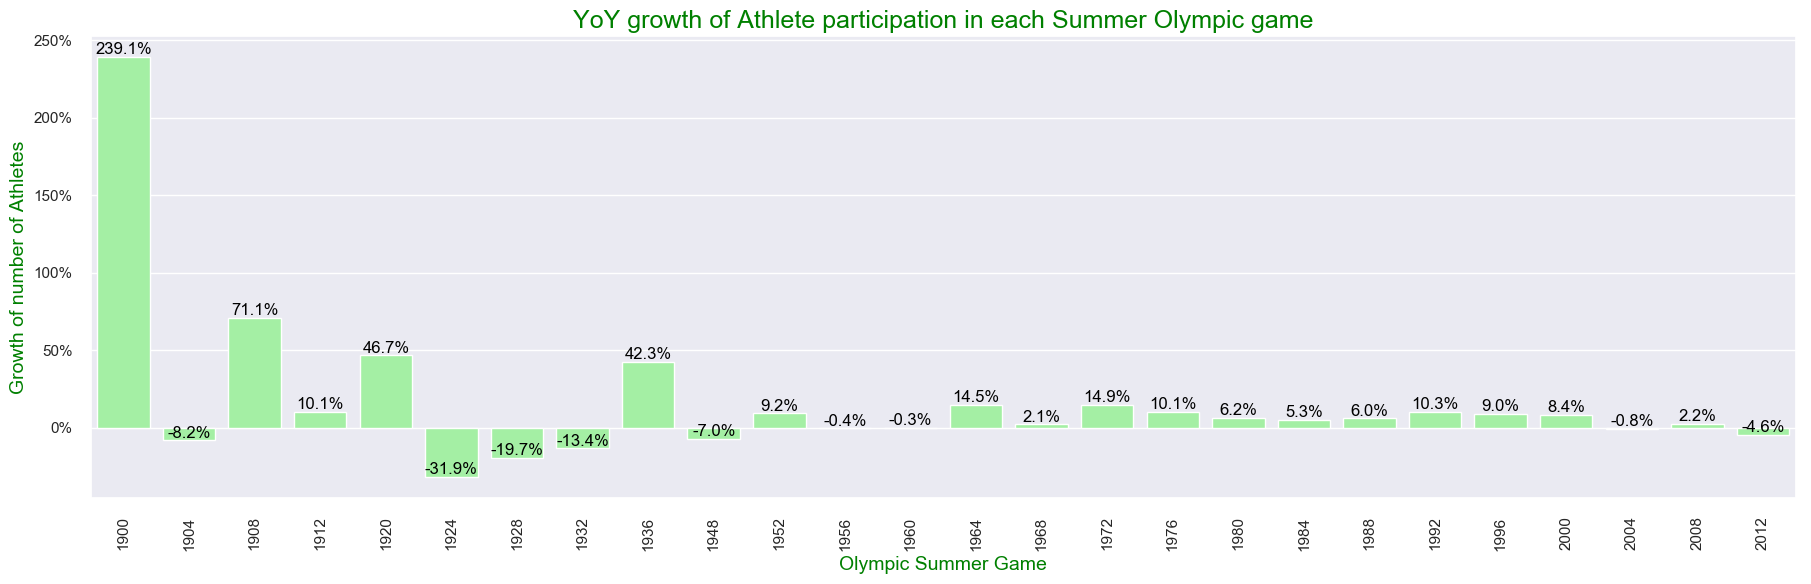

In [46]:
summer_games_athletes = olympic.pivot_table(olympic, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
summer_games_athletes['ID1'] = summer_games_athletes['id'].shift(1)
summer_games_athletes['Growth'] = ((summer_games_athletes['id']-summer_games_athletes['ID1']))/summer_games_athletes['ID1']
summer_games_athletes.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Year', y='Growth', data=summer_games_athletes, ax=ax, color="palegreen")
a.set_xticklabels(labels=summer_games_athletes['Year'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '{:,.1%}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Summer Game', size=14, color="green")
ax.set_ylabel('Growth of number of Athletes', size=14, color="green")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set_title('YoY growth of Athlete participation in each Summer Olympic game', size=18, color="green")

plt.show()

1. Growth in the __number of athletes__ in Summer Olympics have become __stagnant__ in the last 4 games.
2. In the last 4 summer games, the __growth/degrowth__ of number of athletes in Summer Olympics ranges between __-5% to 8%__.

## 18. Number of events in each sport over years [Heatmap]

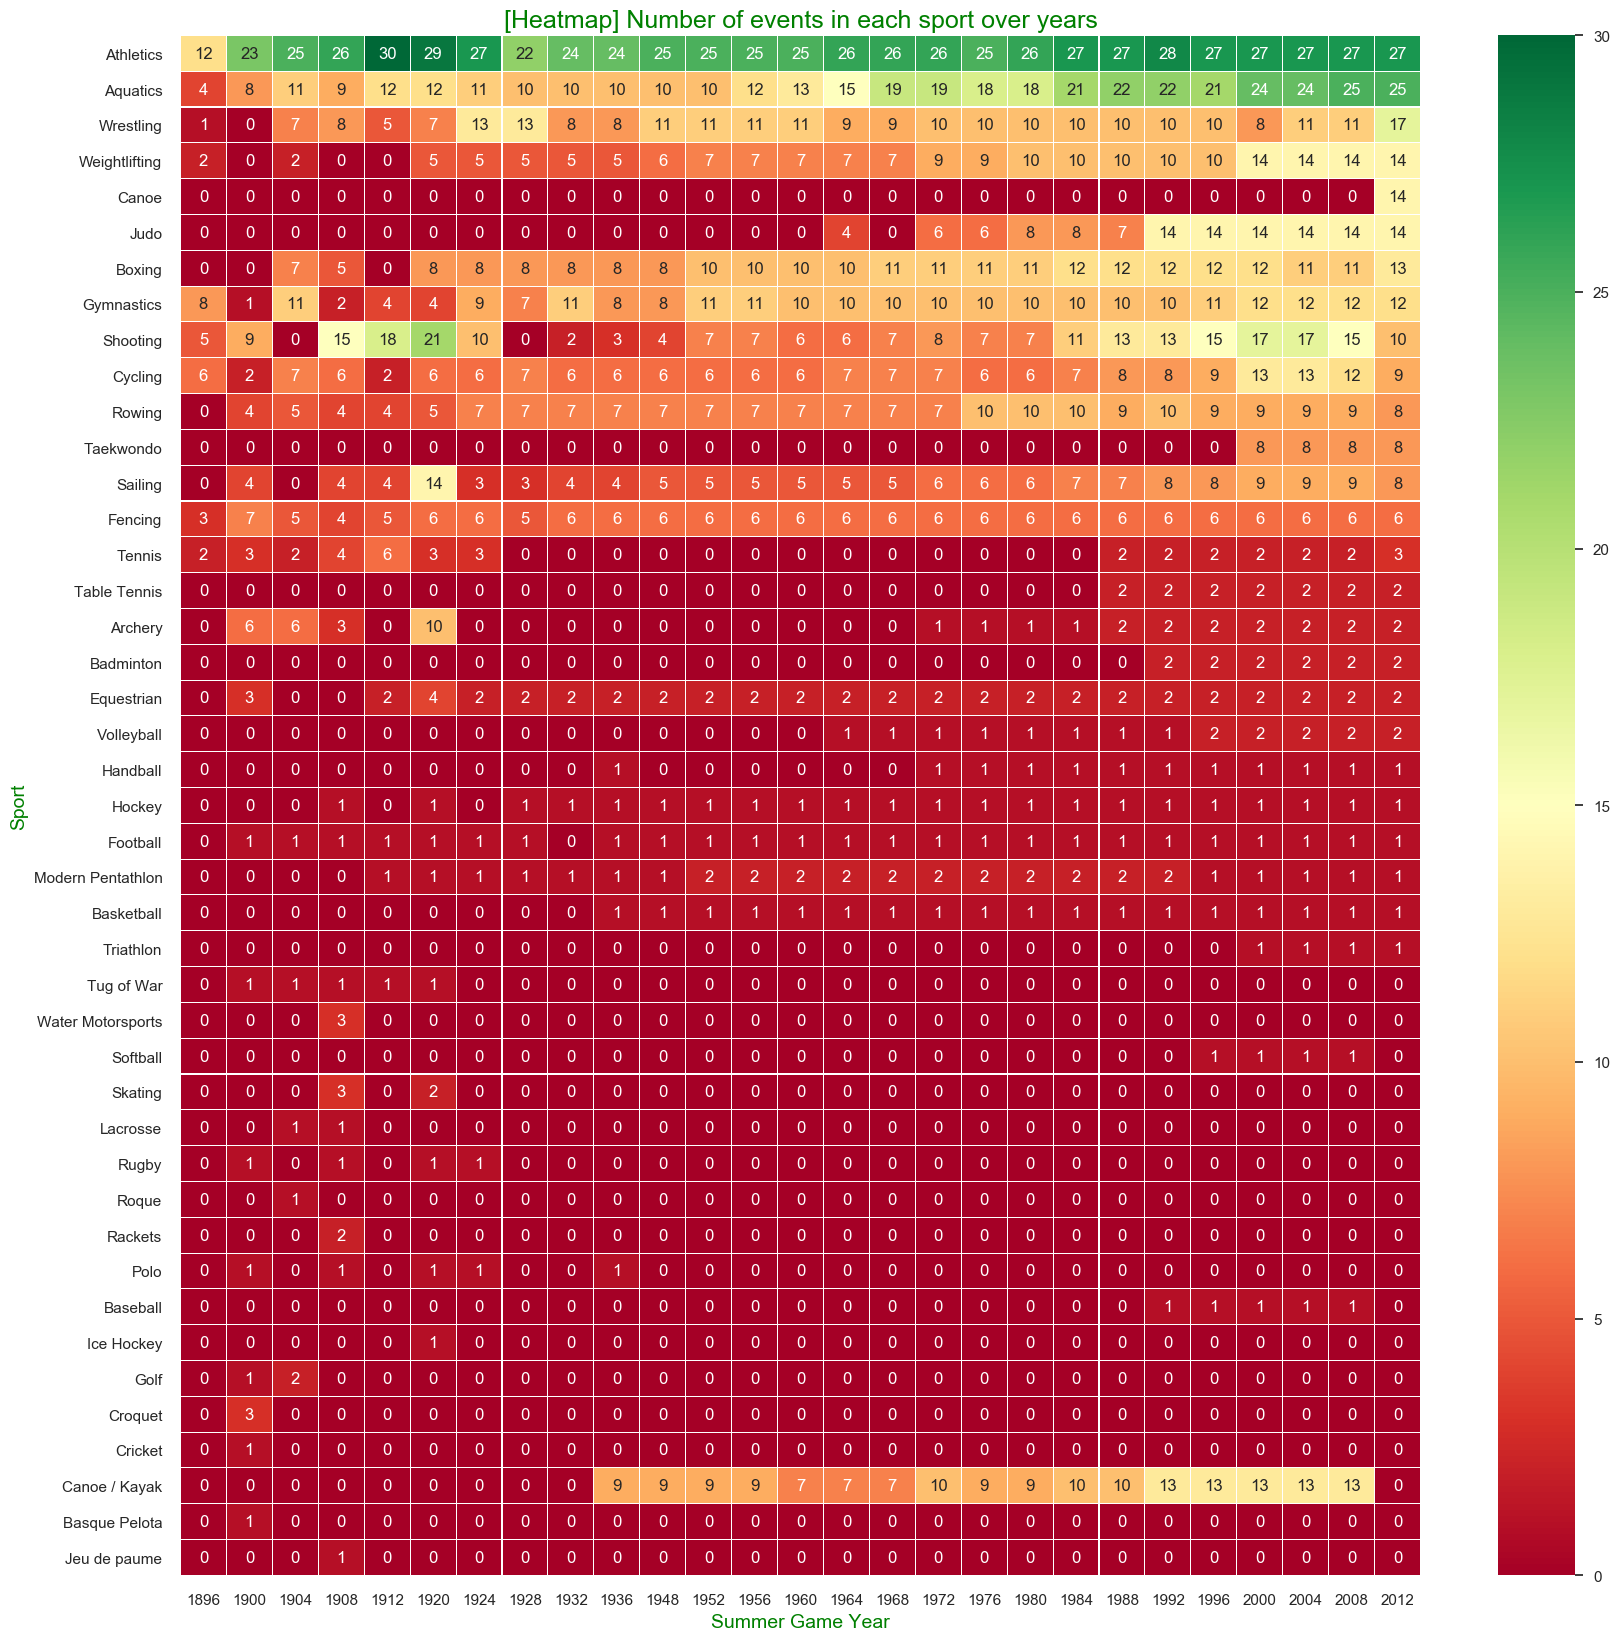

In [47]:
sport_year = olympic.pivot_table(olympic, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2012, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()

__Athletics__ and __Aquatics__ are the sports which has the maximum number of events

## 19. [Gender Ratio] Male vs Female Athletes in Summer Olympic games

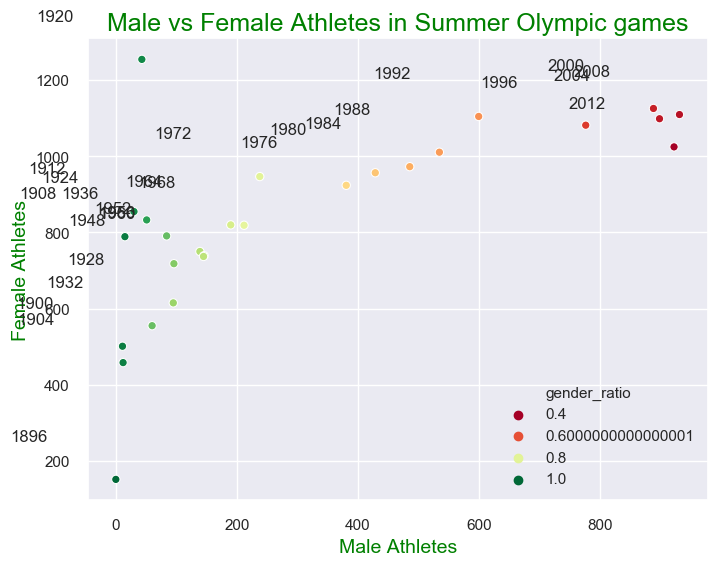

In [48]:
game_sex = olympic.pivot_table(olympic, index=['Year','Gender'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Gender','id']]
game_sex = game_sex.pivot_table(game_sex, index=['Year'], columns='Gender', aggfunc=sum).reset_index()
game_sex.columns = ['Year','Women','Men']
game_sex.fillna(0,inplace=True)
game_sex['gender_ratio'] = game_sex['Women'] / (game_sex['Women'] + game_sex['Men'])

fig, ax = plt.subplots(figsize=(8,6))
a = sns.scatterplot(x="Men", y="Women", hue="gender_ratio", palette='RdYlGn', data=game_sex, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-175, point['y']+100, '{0:.0f}'.format(point['val']))

label_point(game_sex['Men'],game_sex['Women'],game_sex['Year'],ax)
        
ax.set_xlabel('Male Athletes', size=14, color="green")
ax.set_ylabel('Female Athletes', size=14, color="green")
ax.set_title('Male vs Female Athletes in Summer Olympic games', size=18, color="green")
plt.show()

1. Only the __first edition__ of Olympics didn't have any female athletes. 
2. Only from the __late 1980s__, there has been a great __improvement in female representation__.

## 20. Top 10 countries with total medals in Summer Olympic games

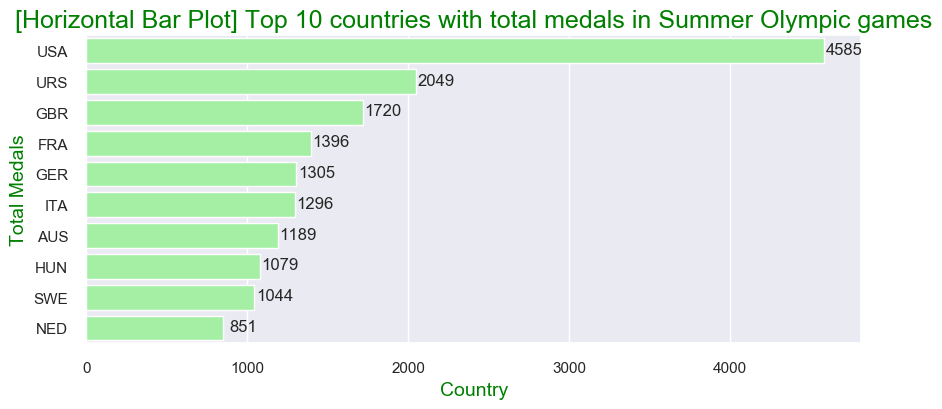

In [49]:
t10_summer =olympic[(olympic['Medal']!='No Medal')].groupby('Country').count().reset_index()[['Country','Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="Medal", y="Country", data=t10_summer, label="Country", color="palegreen")

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Country', size=14, color="green")
ax.set_ylabel('Total Medals', size=14, color="green")
ax.set_title('[Horizontal Bar Plot] Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()

__USA, Russia and Great Britain__ are the top 3 countries in Summer Olympics medal tally. 

Let's analyze their data in detail.

### 20.1 USA Medals in Sports across Years 

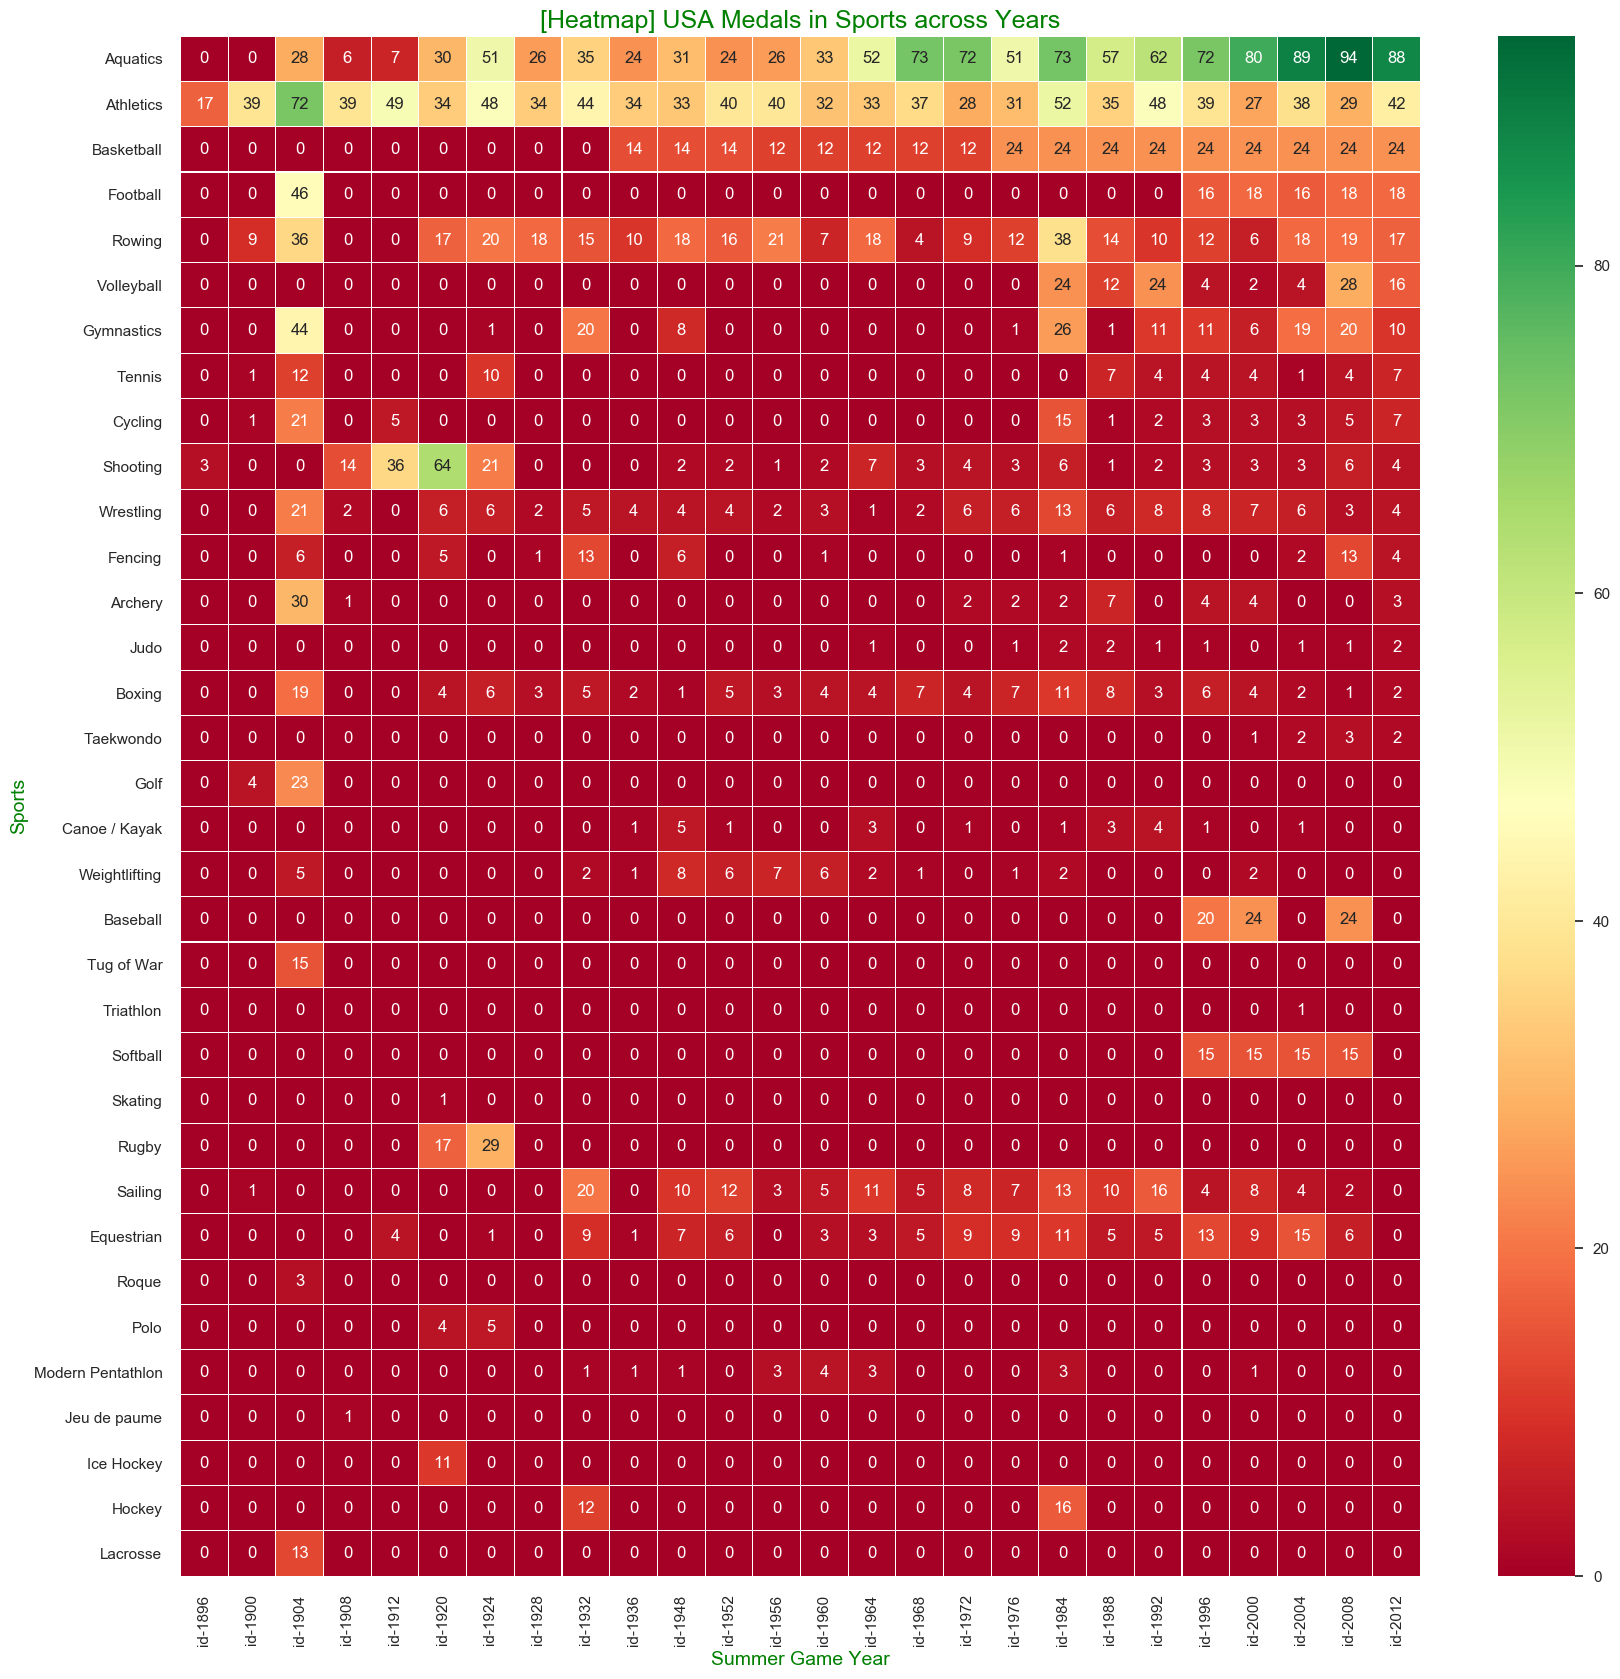

In [50]:
t3_summer = olympic[(olympic['Country'].isin(['USA'])) & (olympic['Medal']!='No Medal')]
t3_summer = pd.pivot_table(t3_summer, index=['Sport'], columns=['Year'], values=['id'],  aggfunc=len, fill_value=0)
t3_summer = t3_summer.reindex(t3_summer['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(t3_summer, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] USA Medals in Sports across Years', size=18, color="green")
plt.show()

__USA__ has bagged a lot of medals in Aquatics and Athletics.

### 20.2 Russia Medals in Sports across Years

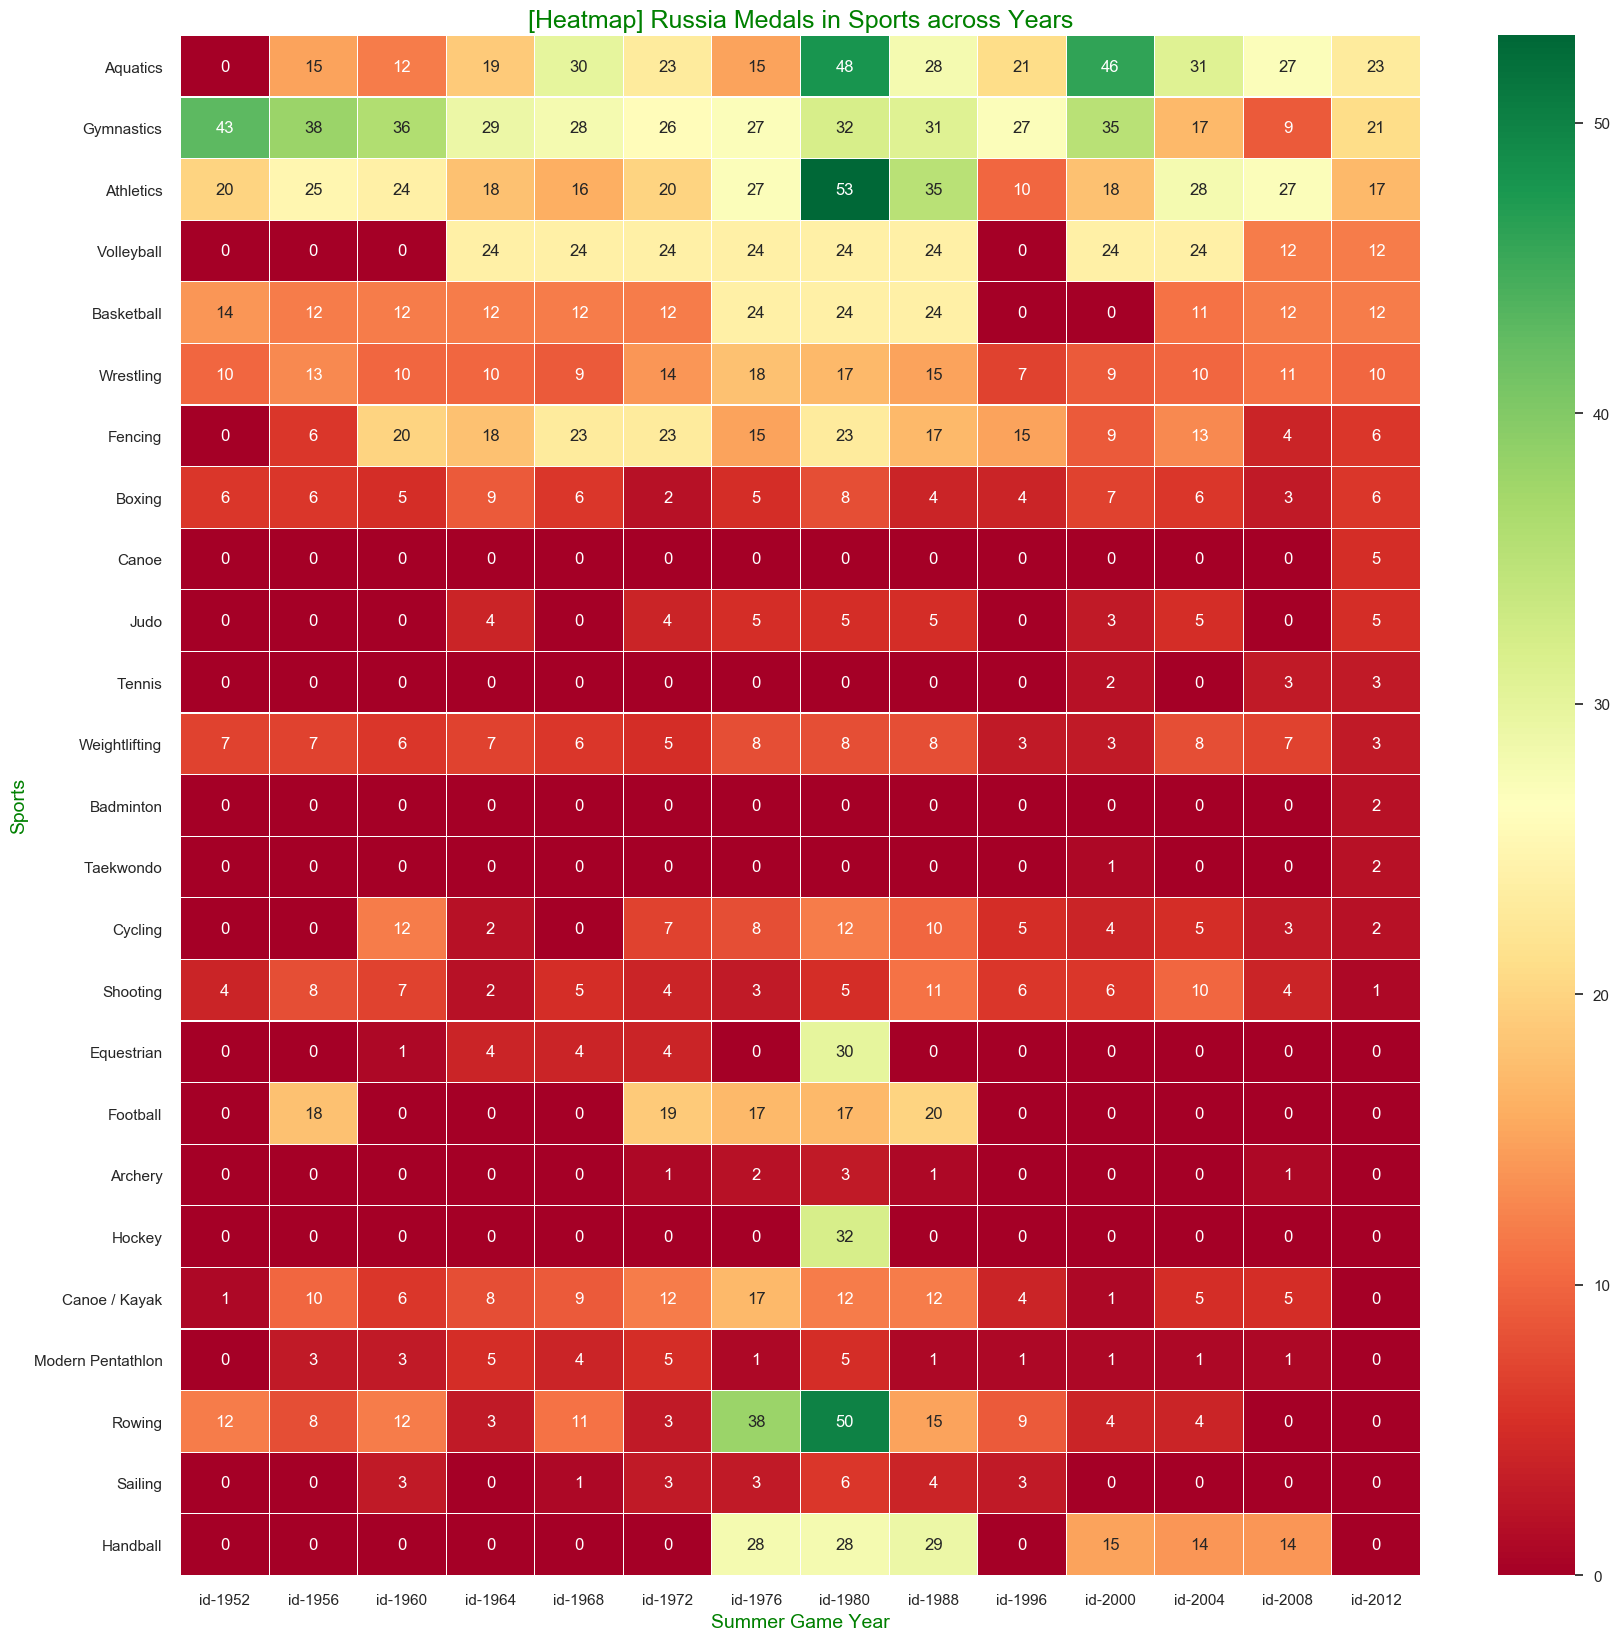

In [51]:
t3_summer = olympic[((olympic['Country'].isin(['URS'])) | (olympic['Country'].isin(['RUS']))) & (olympic['Medal']!='No Medal')]
t3_summer = pd.pivot_table(t3_summer, index=['Sport'], columns=['Year'], values=['id'],  aggfunc=len, fill_value=0)
t3_summer = t3_summer.reindex(t3_summer['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(t3_summer, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] Russia Medals in Sports across Years', size=18, color="green")
plt.show()

__Russia__ has bagged a lot of medals in Aquatics, Gymnastics and Athletics

### 20.3 Great Britain Medals in Sports across Years

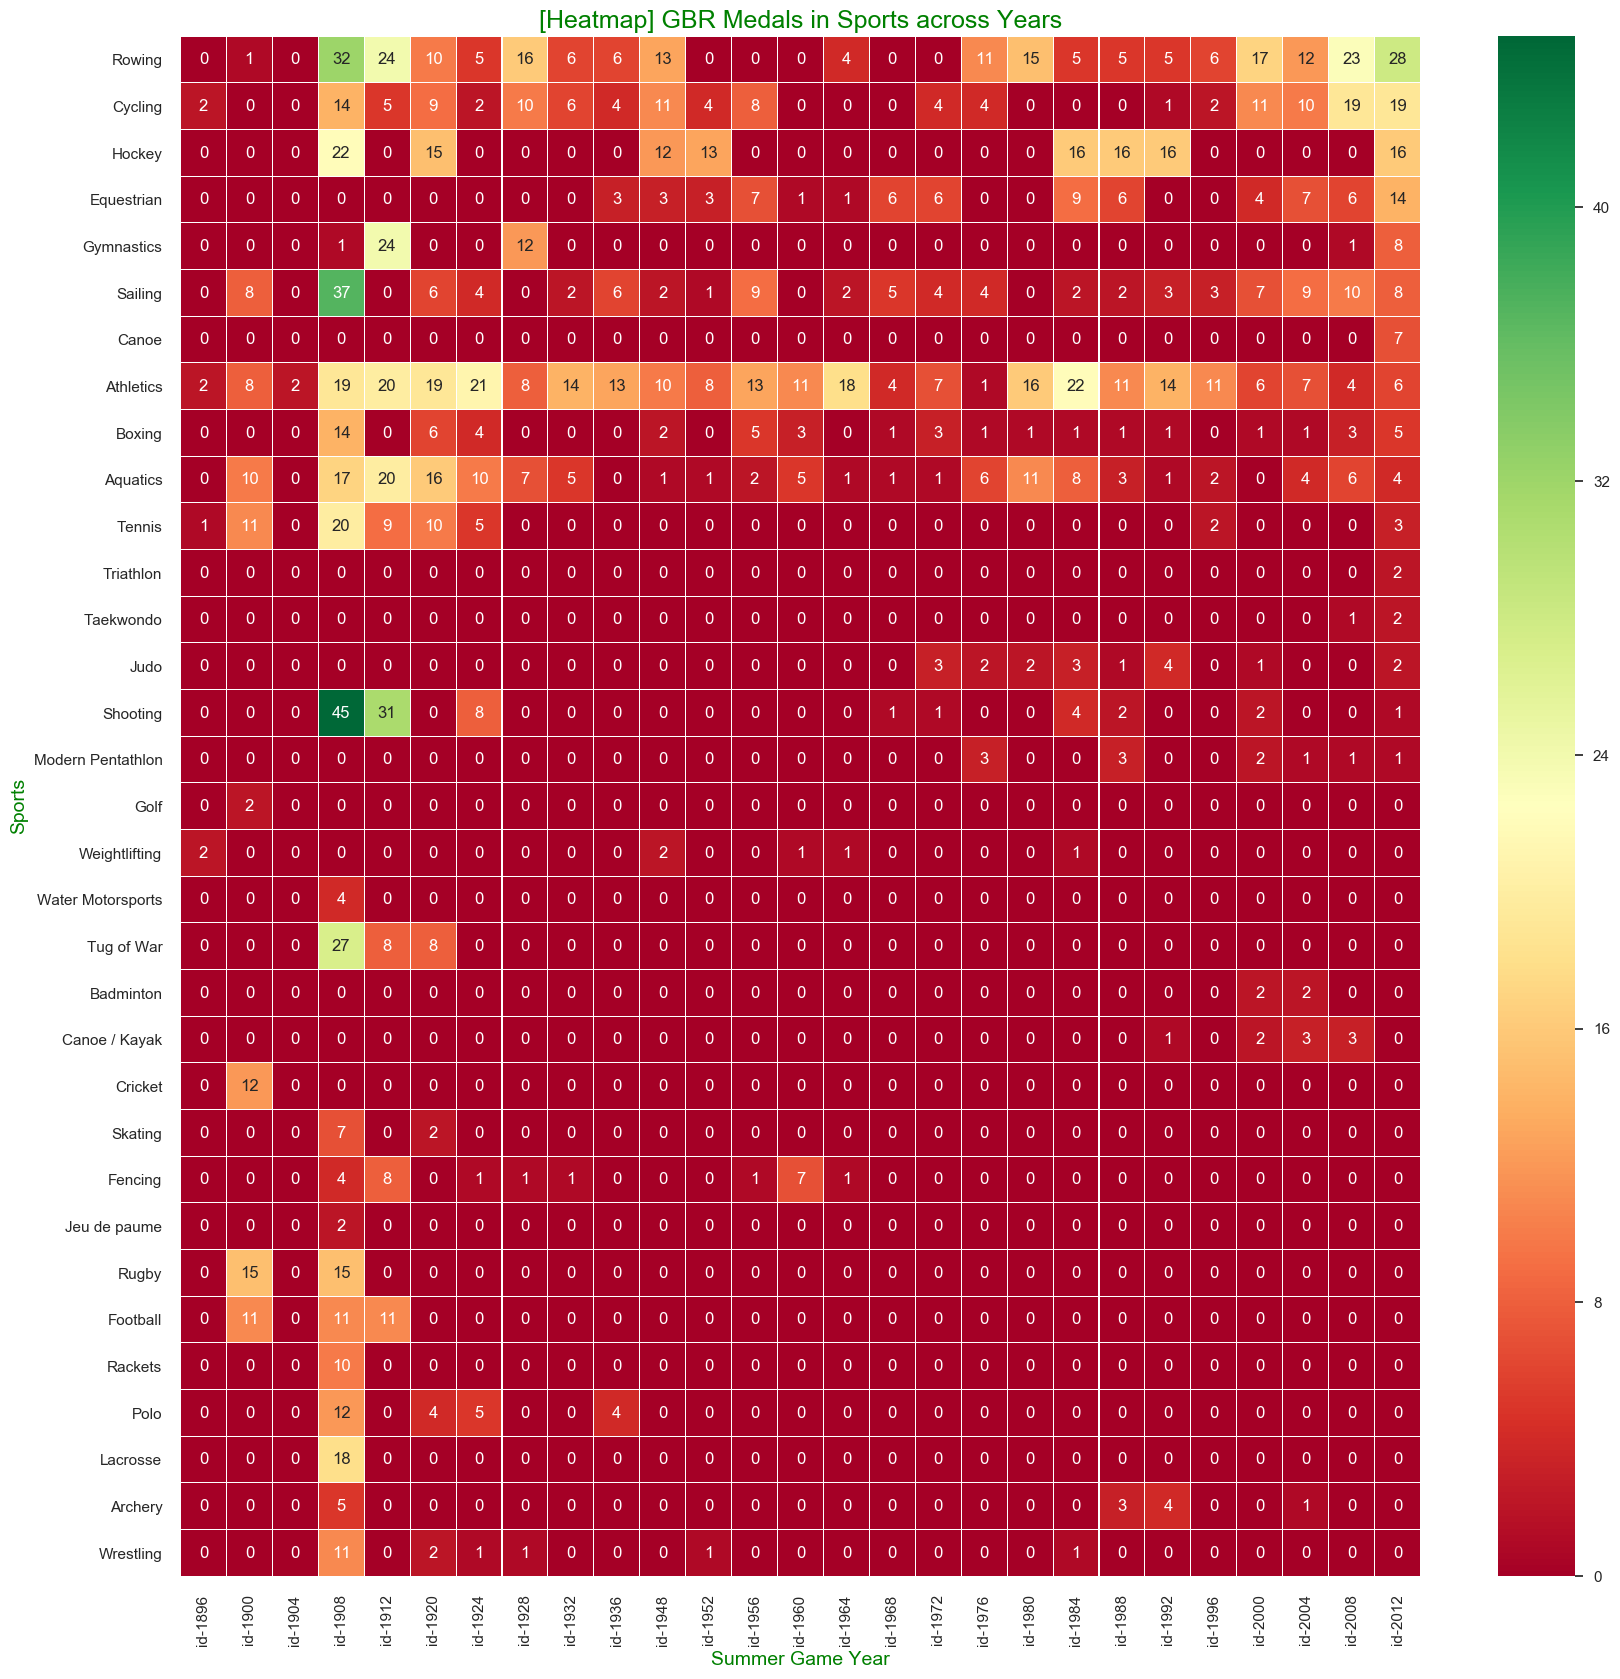

In [52]:
t3_summer = olympic[(olympic['Country'].isin(['GBR'])) & (olympic['Medal']!='No Medal')]
t3_summer = pd.pivot_table(t3_summer, index=['Sport'], columns=['Year'], values=['id'],  aggfunc=len, fill_value=0)
t3_summer = t3_summer.reindex(t3_summer['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(t3_summer, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] GBR Medals in Sports across Years', size=18, color="green")
plt.show()

__Britain__ has bagged many medals in Rowing, Cycling and Aquatics

## 21. Athletes participation by gender over years for Olympics

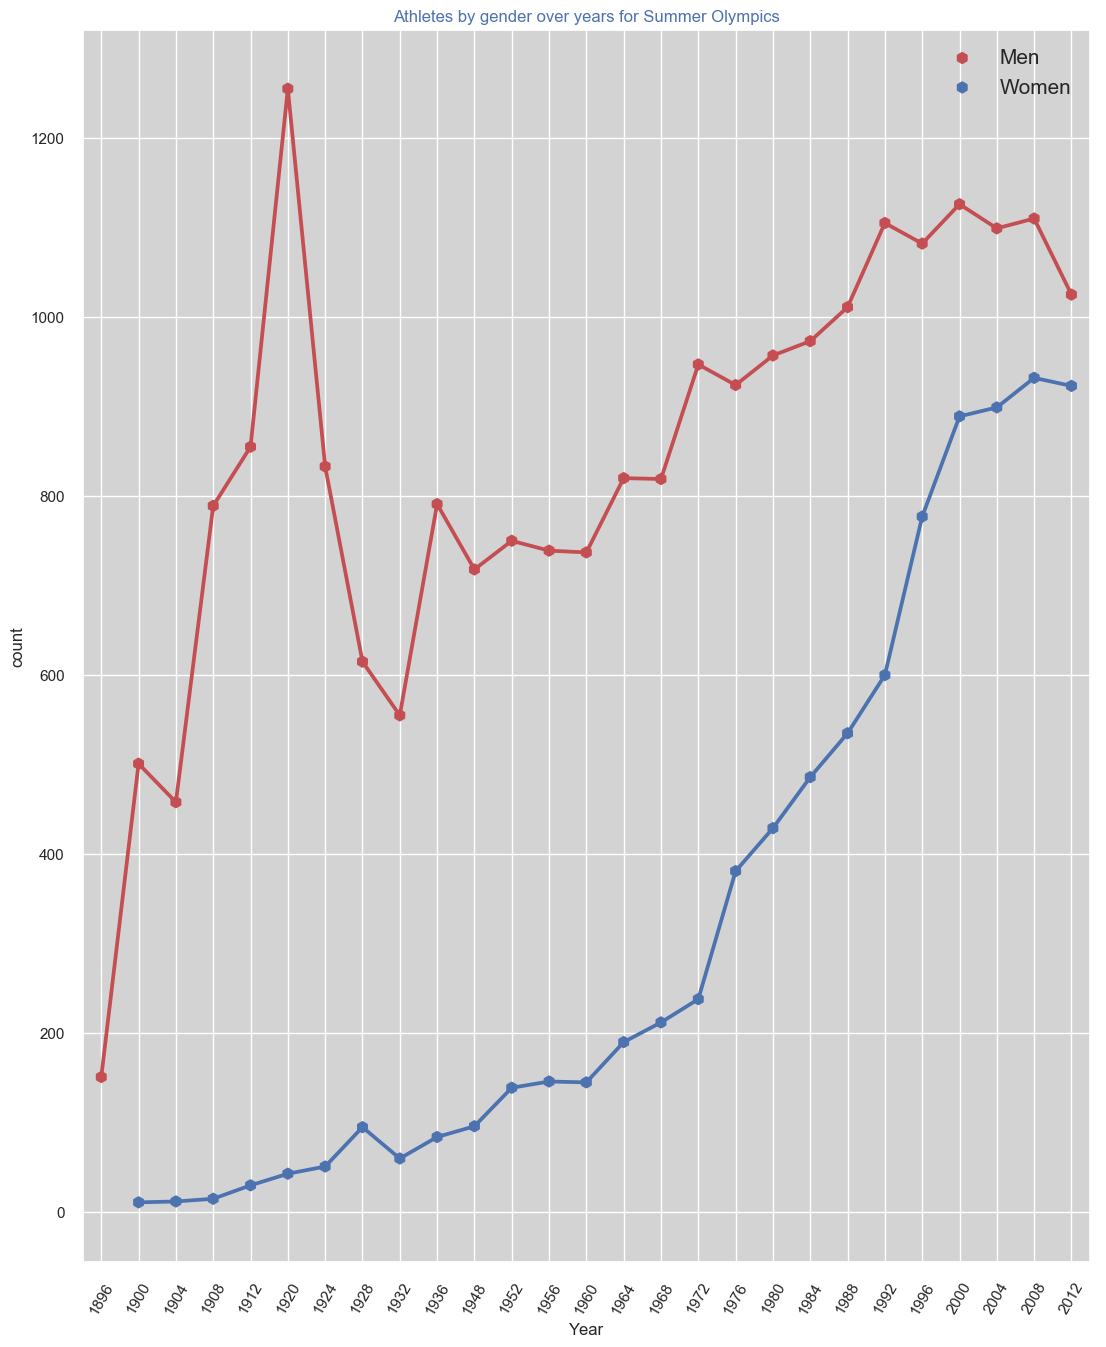

In [53]:
sum_gc = olympic.groupby(["Year","Gender"])["id"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
ax = sns.pointplot(x = sum_gc["Year"] , y = sum_gc["id"],
                   markers="h" , hue = sum_gc["Gender"],palette = ["r","b"])
plt.grid(True)
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Athletes by gender over years for Summer Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})


## 22. Countries participation at the Olympic Games

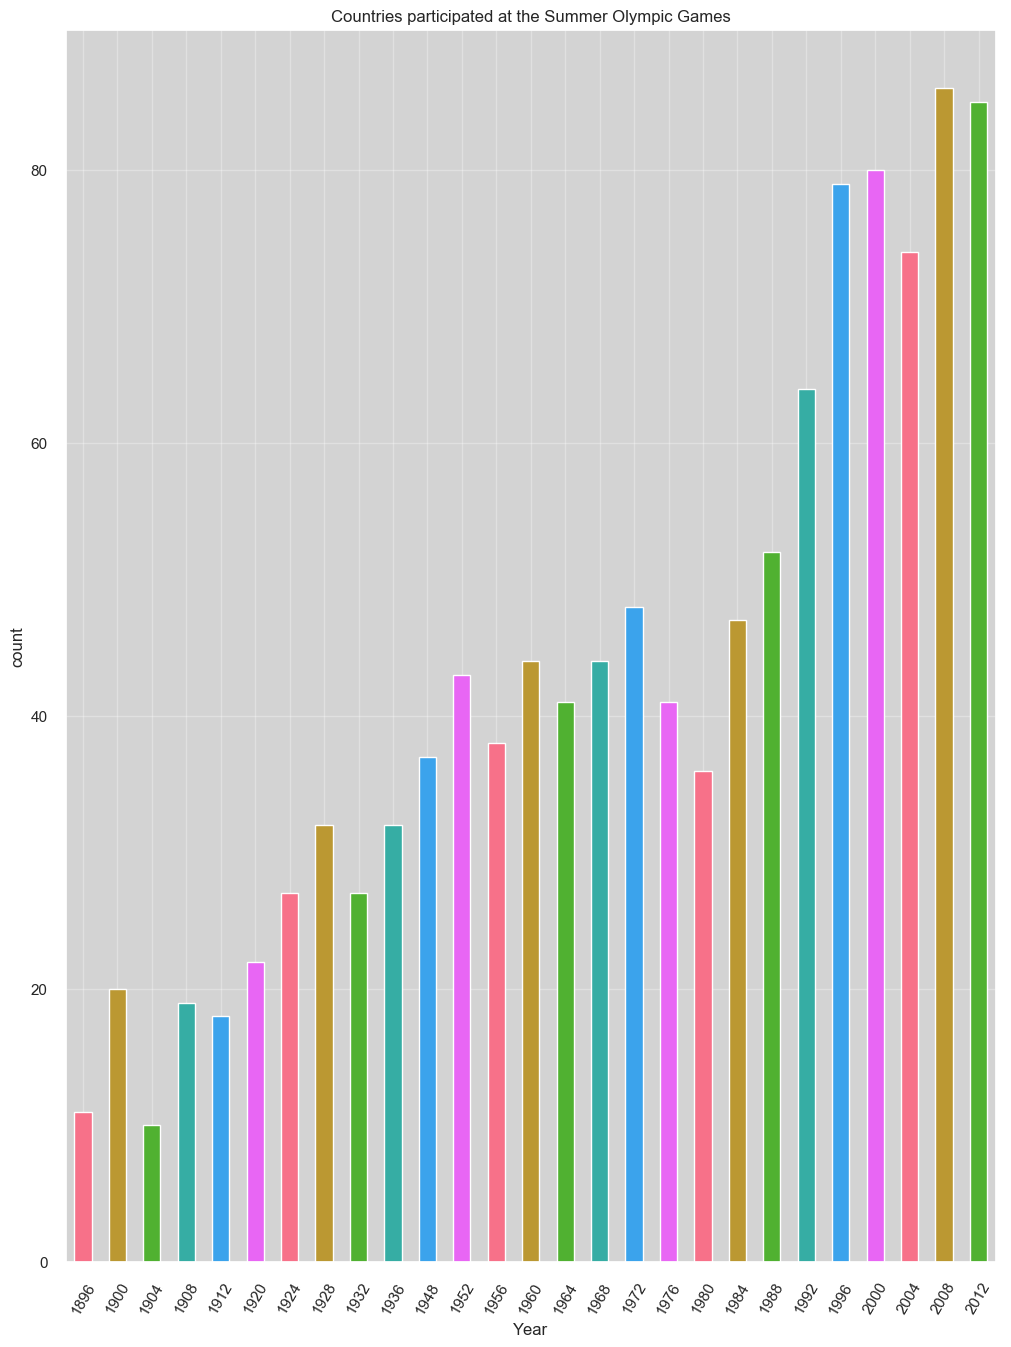

In [54]:
plt.figure(figsize=(12,16))
ax = olympic.groupby("Year")["Country"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                  edgecolor=  "w"*olympic["Year"].nunique())
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Countries participated at the Summer Olympic Games")
plt.grid(True,alpha=.3)

## 23. Nations with highest number of participation in olympics

Text(0.5, 1.0, 'countries - summer olympics')

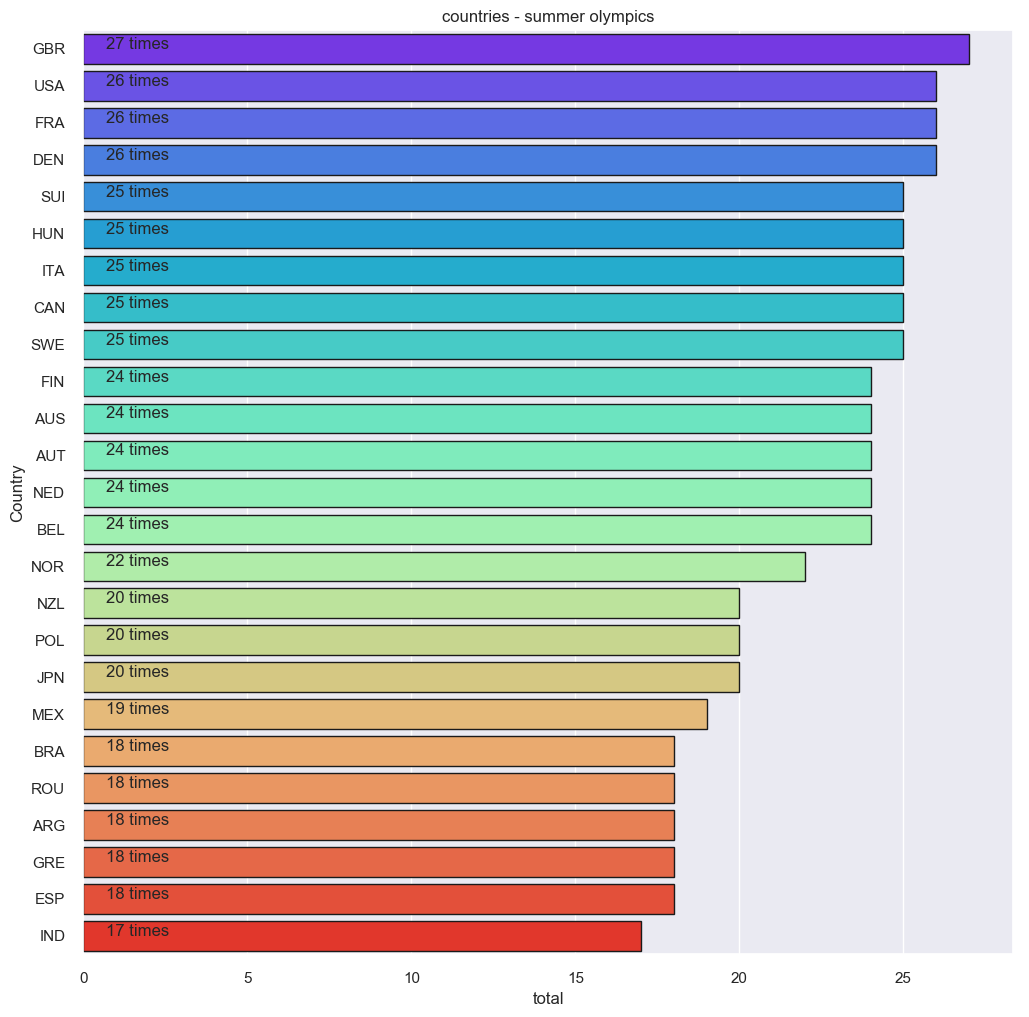

In [55]:
yr_cn = pd.crosstab(olympic["Country"],olympic["Year"]).reset_index()
cols = yr_cn.columns[1:]

for i in cols:
    yr_cn[i] = np.where(yr_cn[i] > 0 ,1,0)
    
yr_cn["total"] = yr_cn[cols].sum(axis = 1)
yr_cn = yr_cn.sort_values(by = "total",ascending=False)


plt.figure(figsize=(12,12))
ax = sns.barplot("total","Country",data=yr_cn[:25],
                 linewidth = 1,edgecolor = "k"*25,
                 palette = "rainbow"
                )

for i,j in enumerate(yr_cn["total"][:25].astype(str) + " times"):
    ax.text(.7,i,j,fontsize = 12)
    
plt.title("countries - summer olympics")

## 24. Events held in summer olympics

Text(0.5, 1.0, 'Unique sport Events over years for Summer Olympics')

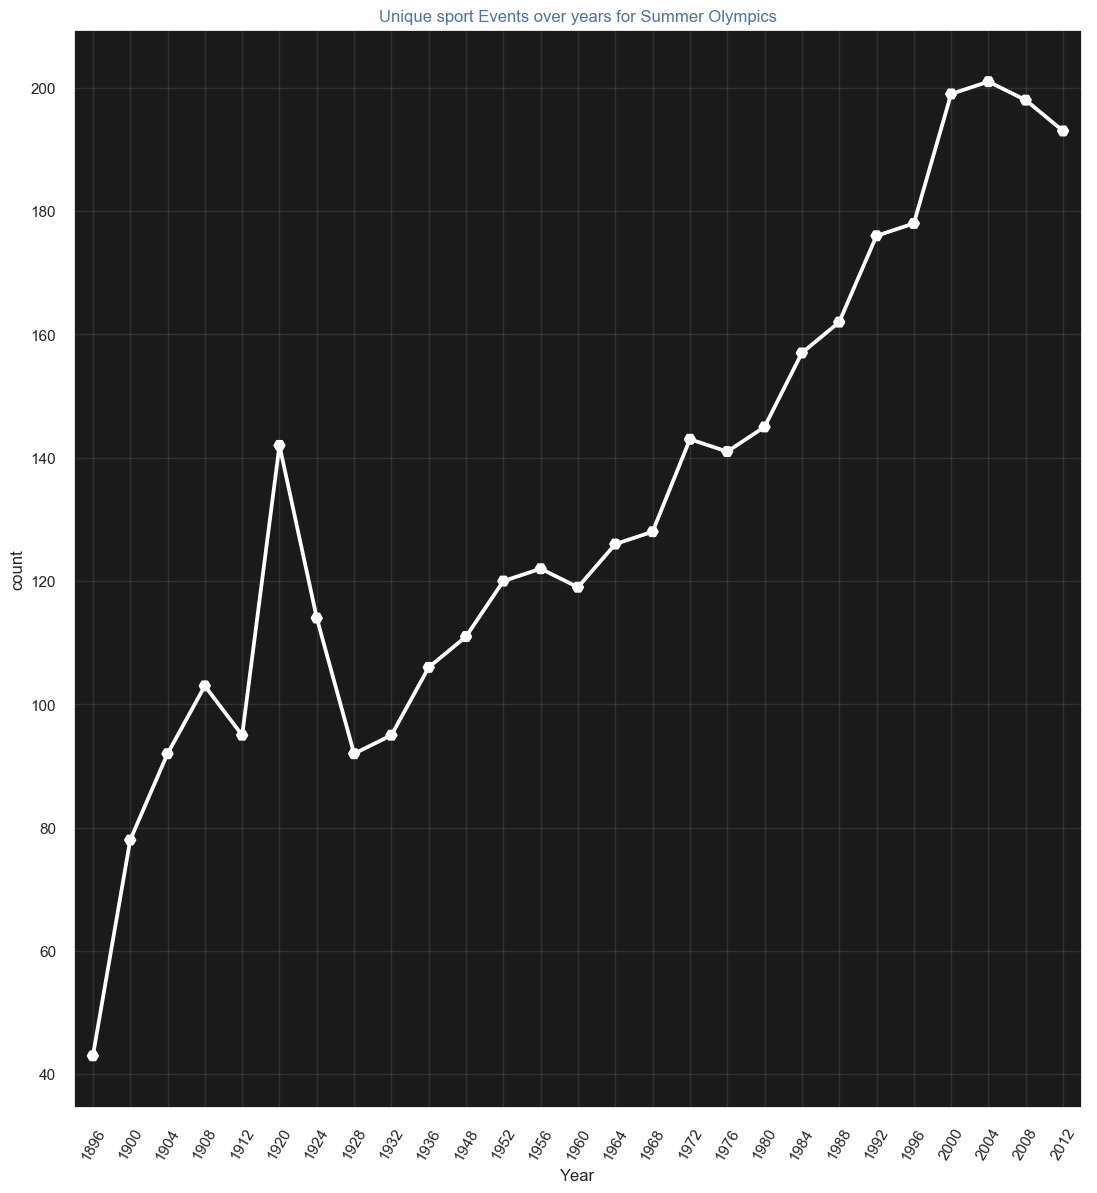

In [56]:
ev_s = olympic.groupby("Year")["Event"].nunique().reset_index()
plt.figure(figsize=(13,14))

ax = sns.pointplot(ev_s["Year"],ev_s["Event"],color="w",markers="H")
plt.xticks(rotation = 60)
ax.set_facecolor("k")
plt.grid(True,alpha=.1)
plt.ylabel("count")
plt.title("Unique sport Events over years for Summer Olympics",color="b")

# Conclusion

- 1. __43__ uniques events we had thus far, in Summer Olympics
- 2. Year in which the sport was inducted into Olympics
    __Oldest Sport__
    - Aquatics	1896
    - Tennis	1896
    - Shooting	1896
    - Weightlifting	1896
    - Gymnastics	1896
    - Fencing	1896
    - Cycling	1896
    - Wrestling	1896
    - Athletics	1896
    __Newest Sport__
    - Taekwondo	2000
    - Triathlon	2000
    - Canoe	2012
- 3.1 __2002, 2004 & 2008__ seems to be the year where most Sports events were held
- 3.2 __1896__ seems to be the year with lowest number of Sports events, this is the year Olympics started.
- 3.3 From 1984 we see a raise, and it is almost consistent from 1996.
- 4.1 In __1986 Olympics, participants were all Men__.
- 4.2 Women participation seems less and has slightly improved, post 1972.
- 4.3 Post 1972, we see Women participation grow but they still are lesser than the count of Men who participate in these games.
- 4.4 Olympics continues to be __male dominated__ though trends show this is likely to change in near future.
- 4.5 For Men Athletes: 
    - The growth for men seems less strong:
    - After the 2000 we can see a relevant decrease in the number of male athletes at the summer games;
    - The growth has decreased recently.
- 5. Gender Distribution for Summer Olympics
    - __Male - 73%__
    - __Female - 27%__
- 6.1 21 cities hosted the Summer Olympics games, since 1896.
- 6.2 Cities which conducted Olympics was  more than once
    - __London                   3__
    - __Los Angeles              2__
    - __Athens                   2__
    - __Paris                    2__
    There are 21 cities in which Summer Olympics was conducted since 1896
- 7.1 Overall, with repect to Gold medals, __United States__ seems to top the list, with more than twice the medal haul of the second place holder __USR(Soviet)__.
- 7.2 __Germanay__ and __Great Britain__ comes third
- 7.3 __Sweden__ and __EUN__ has the least.
- 8. __Women Medals__ counts incresed since 1972and is more or less saturated since last 3-4 Seasons9. 
- 9. Top 5 Countries to win most Gold medals so far 
     Country 	  Medal
    1  __USA       2235__
    2  __URS	    838__
    3  __GBR	    546__
    4  __ITA	    476__
    5  __GER	    452__
- 10. __Basketball is the leading discipline__
- 11. __Athletics__ and __Aquatics__ are the sports which has the maximum number of events
- 12. __Growth__ is saturated and started moving in negative direction in number of athletes
    - __28 sports competitions__ is the maximum in a summer olympic game.
    - __Events__ have come to a __saturation point__ in the last 4 summer games.
    - In the last 4 summer games, the __growth/degrowth__ of number of athletes in Summer Olympics ranges between __-5% to 8%__
- 13. USA, Russia and Great Britain are the top 3 countries in Summer Olympics medal tally.
    - USA has bagged a lot of medals in Aquatics and Athletics.
    - Russia has bagged a lot of medals in Aquatics, Gymnastics and Athletics
    - Britain has bagged many medals in Rowing, Cycling and Aquatics
- 14. __GBR, USA, FRA, DEN__ have highest participation in summer olympics 